# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime # time specific functionality

# Libraries for data preparation and model building
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import plot_tree

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 50

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train_train` file into a DataFrame. |

---

In [2]:
# load the data
train = pd.read_csv("df_train.csv")
test = pd.read_csv("df_test.csv")

**Why is this data set important?**

Spain is the 6th largest energy consumer in Europe, the country consumes 239 Million MWH every year. This is a massive number considering there is virtually no domestic production of liquid fuels or natural gas. With the recent increase in the natural gas price over the last two years consumers in Spain are paying 250% more per Kwh than they were in 2020.  In Euros this is an increase of 23 422 billion Euros that consumers are having to pay. This is unsustainable and therefore, there is a drive to use more renewable energy sources. Although this is a step in the right direction, Spain as a whole is still heavily dependent on fossil fuels to meet their energy shortfall needs .

Therefore, attempt to predict future load shortfalls which will allow better management of electricity supply. Advance predication will enable better planning when in the event of anticipated short falls.

Just to clarify:  in this case a load shortfall is the amount of electricity used that was not produced by a renewable energy source.

The tool used to accomplish this goal is supervised machine learning. Basically how this works, is by using data and running it through technical models. These models then predict an outcome. 
What we need to see is if these predictions are accurate or not. 

The data is sourced from Kaggle which is an online source that anyone can access. It has vast data sets, used in machine learning models to solve real world problems.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get us the answers need.

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data such as detect outliers.

So, we will screen our dataset so it can give us insight about the data and what to expect from the modeling.

There are two types of data sets. One we use to train our model, the other we use to test our model. Our training data contained 8763 rows and 49 columns while our testing data contained 2920 rows with 48 columns. The testing data of course has a missing column, the load shortfall field which is what our models aimed to predict. As in business, there is always an information challenge. And not every data set may be complete. Therefore, data integrity is essential in providing accurate outcomes. After all, GIGO (garbage in, garbage out) is a very real thing!

For example, if there is missing data - you can remove it or replace it. It’s also important that data is in the right format so the model can use it. Exploring the raw data to decide a course of action is the first and an essential step in successful machine learning outcomes, not to be taken lightly!

In [3]:
# View the amount of rows and columns in the data set df_train
train.shape

(8763, 49)

In [4]:
# View the amount of rows and columns in the data set df_test
test.shape

(2920, 48)

In [5]:
# View the first five rows of df_test
train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

Observations:¶

- There are 49 columns and 8763 rows in Train_df and 2920 rows  48 columns in Test_df
- We have an unnamed column in train_df having the same index value as seen above, this column is insignificant to our use case
- Valencia_wind_deg and Seville_pressure columns show category values, this is a regression (numeric) data, thus requires us to convert to numerical values

In [6]:
# View the first five rows of df_test
test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

- We have an unnamed column having the same index value as seen above.

#### ***Check data types and number of missing values in df_train***
- Here we are going to check what datatypes the features have as well as missing values in the df_train. We will begin with train.info() function which is used to get a concise summary of the dataframe

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- We can see from above from checking the datatype that the dataframe has 3 categorical variables: time, valencia_wind_deg, and Seville_pressure, while the rest are numerical variables consisting of floats or integers

#### ***Sum the total number of null values in each column***
- We use the function dataframe.isnull ().sum ()to return the number of missing values in the data set for instance, If we want to know the total number of missing values in the dataset

In [8]:
train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- So, In this dataset the output shows that only Valencia_pressure has missing values. 

#### ***Check data types and number of missing values in df_test***

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

- We can see from above from checking the datatype that the dataframe has 3 categorical variables: time, valencia_wind_deg, and Seville_pressure, while the rest are numerical variables consisting of floats or integers, it is exactly the same as the Train_df dataframe.

#### ***Sum the total number of null values in each column***

In [10]:
test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

- The output shows that only Valencia_pressure has missing values, it is just the same as train_df only difference is the values.

### ***Univariate Analysis: Non-Graphical***
This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

These are the functions we used in Univariate Analysis
- train.describe()
- train.skew()
- train.kurtosis()

In [11]:
train.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [12]:
test.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count   2920.000000        2920.000000     2920.000000          2920.000000   
mean   10222.500000           2.457820        0.067517             3.012785   
std      843.075718           1.774838        0.153381             1.996340   
min     8763.000000           0.000000        0.000000             0.000000   
25%     9492.750000           1.333333        0.000000             1.666667   
50%    10222.500000           2.000000        0.000000             2.333333   
75%    10952.250000           3.333333        0.000000             4.000000   
max    11682.000000          13.333333        1.600000            14.333333   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       2920.000000      2920.000000        2920.000000   
mean          67.123516        62.644463          43.355422   
std           20.611292        24.138393          30.486298   
min           11.666667         8.000000           0.000000   
25%           52.000000        43.000000          13.333333   
50%           70.333333        63.000000          45.000000   
75%           85.000000        84.000000          75.000000   
max          100.000000       100.000000          97.333333   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        2920.000000         2920.000000      2920.000000  ...   
mean            2.283562           15.477283       162.643836  ...   
std             1.654787           25.289197        97.749873  ...   
min             0.000000            0.000000         0.000000  ...   
25%             1.000000            0.000000        86.666667  ...   
50%             1.666667            0.000000       140.000000  ...   
75%             3.333333           20.000000       233.333333  ...   
max            10.666667           93.333333       360.000000  ...   

       Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
count         2920.000000      2920.000000     2920.000000      2920.000000   
mean           290.695462       288.888393      289.911289       284.920684   
std              7.113599         9.089699        7.119411         6.803424   
min            273.816667       269.816667      272.650000       266.483333   
25%            284.816667       281.483333      284.307500       280.150000   
50%            290.150000       287.483333      289.483333       284.483333   
75%            296.483333       295.483333      295.816667       289.816667   
max            309.483333       313.483333      308.150000       307.483333   

       Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  \
count  2920.000000         2920.000000      2920.000000       2920.000000   
mean    286.522375          289.124971       288.483641        290.152431   
std       6.492355            7.168049         6.221324          7.906915   
min     268.120000          271.483333       270.138667        271.150000   
25%     281.778333          283.483333       284.150000        284.483333   
50%     286.265000          288.816667       288.483333        289.150000   
75%     291.119167          295.150000       292.816667        295.150000   
max     308.966667          306.816667       310.816667        314.483333   

       Madrid_temp  Madrid_temp_min  
count  2920.000000      2920.000000  
mean    287.869763       286.618130  
std       8.977511         8.733163  
min     268.713333       267.816667  
25%     280.816667       279.816667  
50%     286.396667       285.483333  
75%     294.452500       293.150000  
max     312.223333       310.150000  

[8 rows x 45 columns]

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

#### ***TRAIN SKEW***

In [13]:
train.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\3574648760.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

- The following features have high positive symmetrical data; Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Barcelona_rain_3h and Valencia_snow_3h.
- Madrid_weather_id, Barcelona_weather_id and Seville_weather_id have data with high negative symmetry.
- It is also noted that these features are identified to have outliers

#### ***TEST SKEW***

In [14]:
test.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\1515727625.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.779108
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_

#### ***TRAIN KURTOSIS***
Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers

In [15]:
train.kurtosis()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\1855142227.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Below are features with large numbers of outliers as shown by kurtosis > 3;

- Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.



#### ***TEST KURTOSIS***

In [16]:
test.kurtosis()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\3827621525.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.567383
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4.966557
Seville_temp_max          -0

#### ***Univariate Analysis: Graphical***

We can look at the distribution of any numerical feature by using the following plot:

- histogram

##### ***CREATE A LIST OF ALL NUMERICAL FEATURES***


In [17]:
# Create a list of all numerical features
train.iloc[:, (np.where((train.dtypes == np.int64) | (train.dtypes == np.float64)))[0]].columns  

Index(['Unnamed: 0', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min',

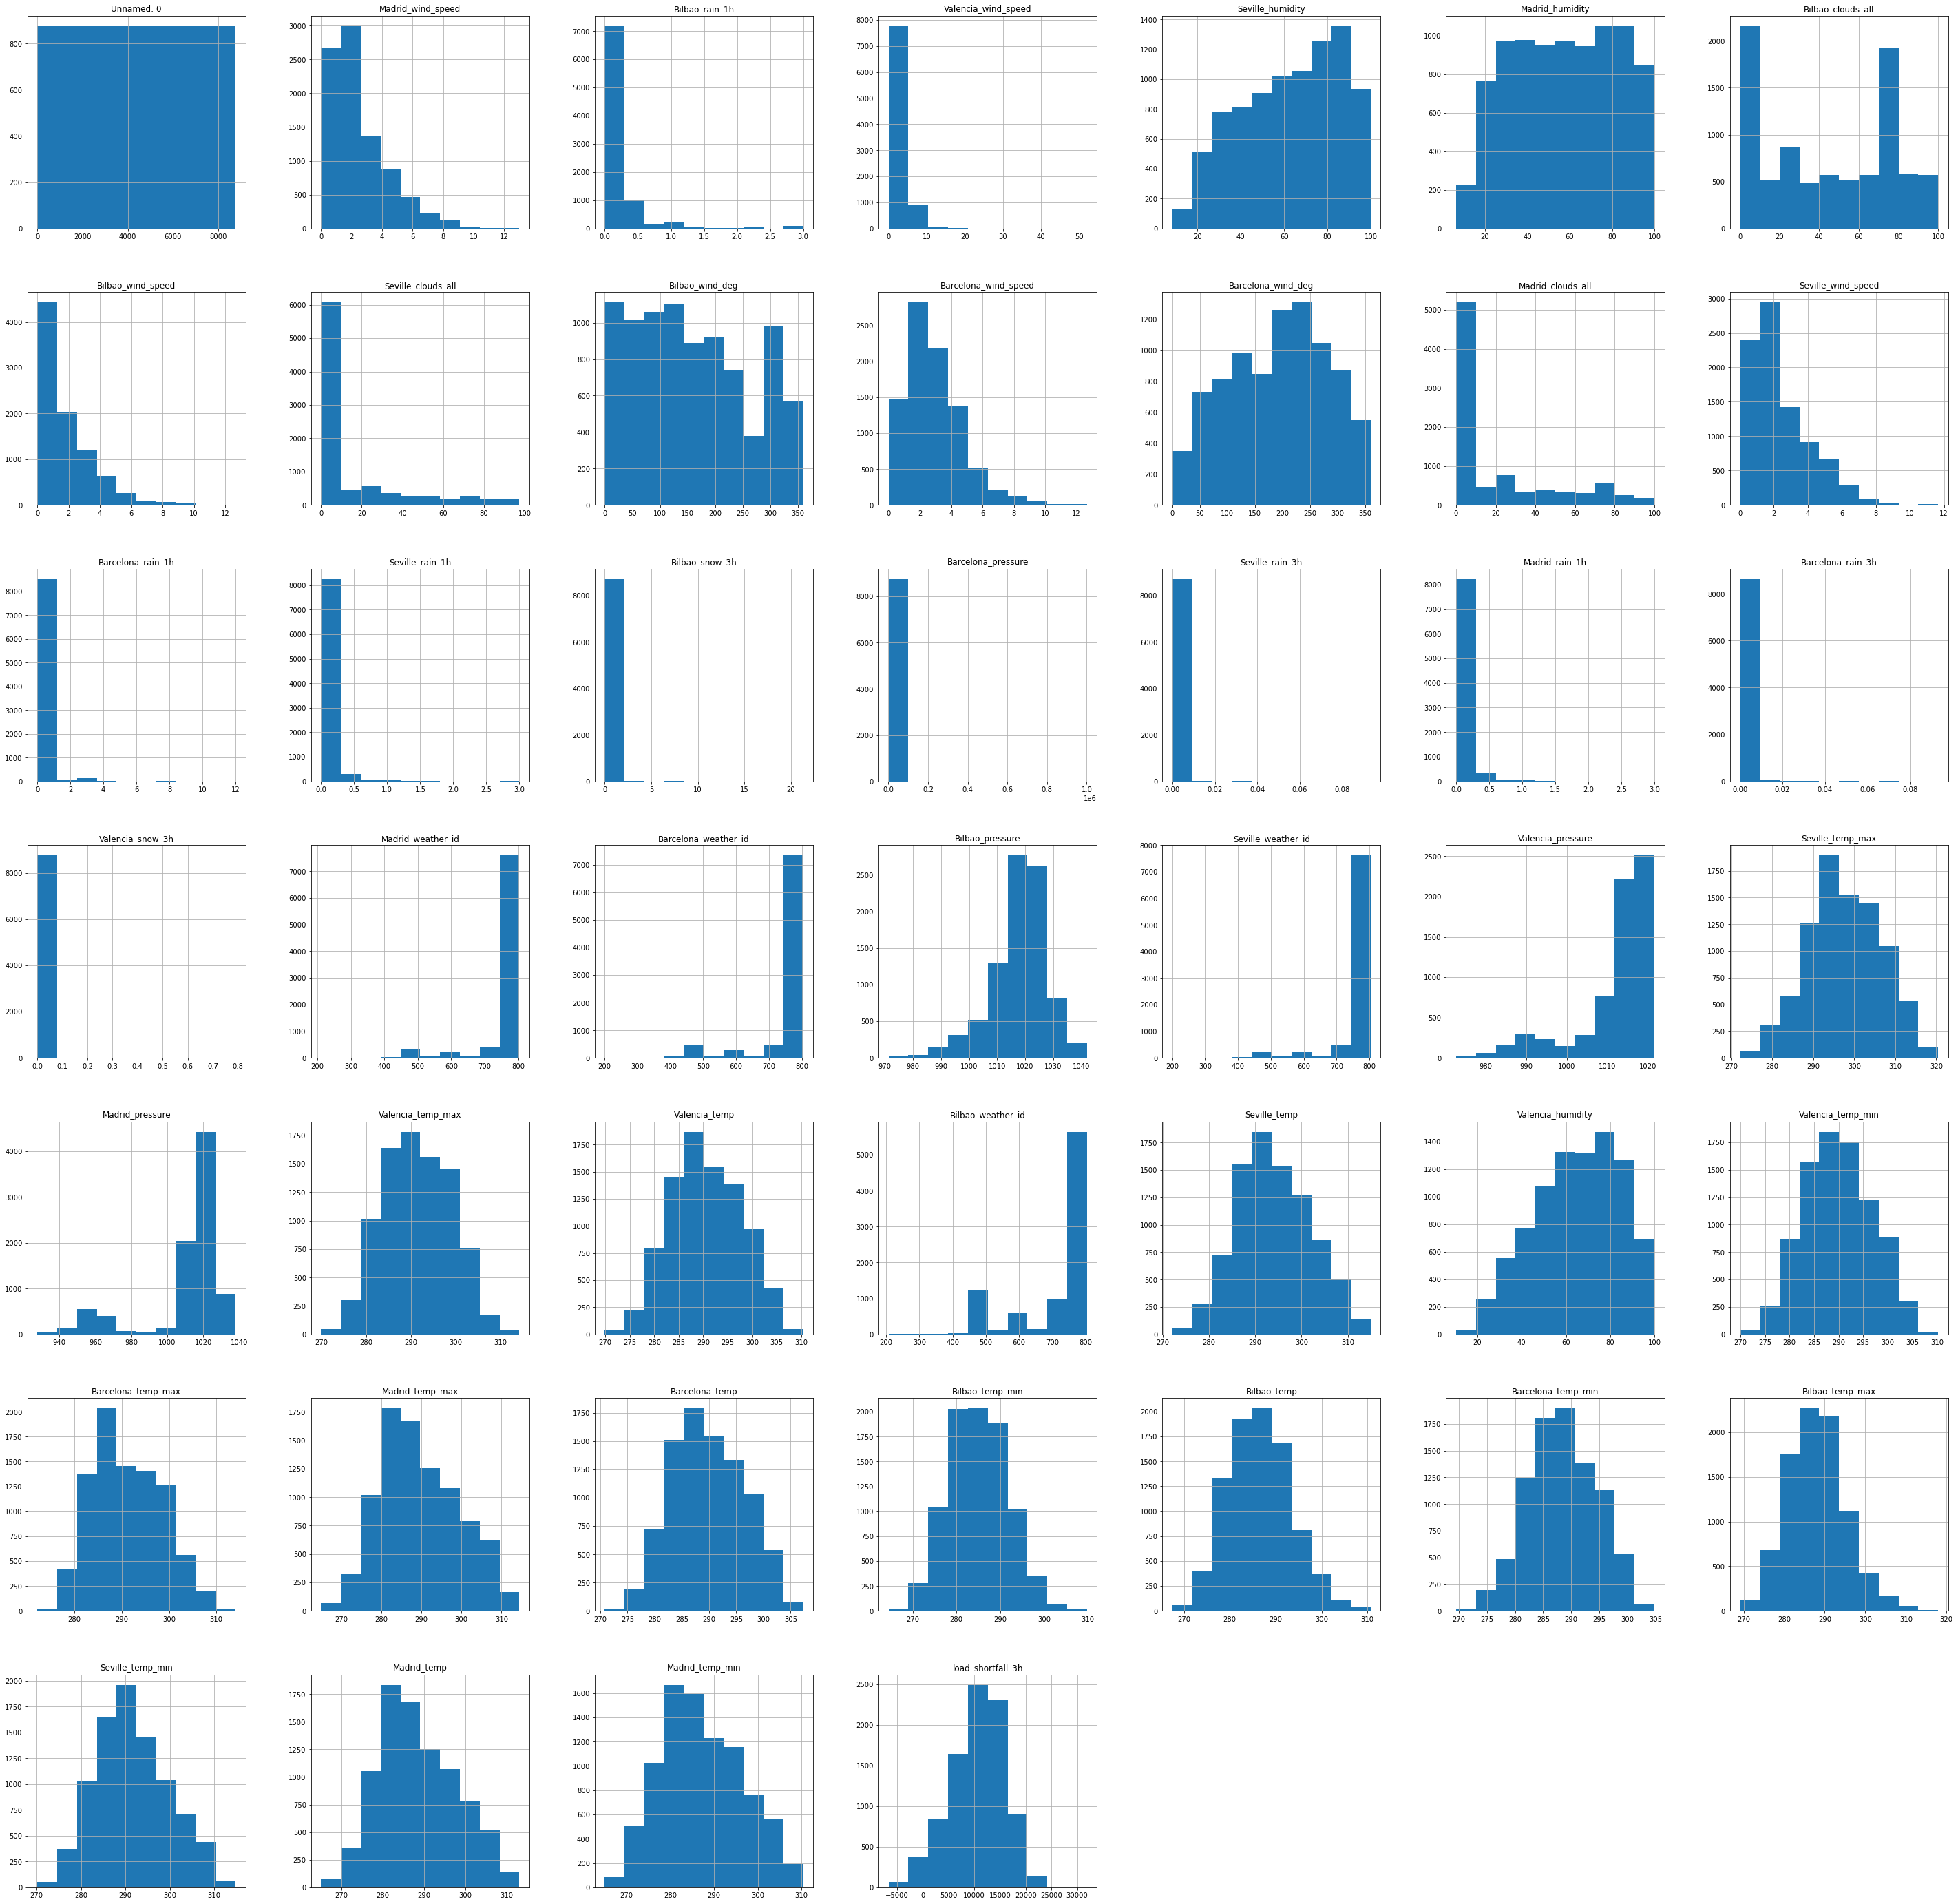

In [18]:
features = ['Unnamed: 0', 'Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure',
       'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h'] 
train[features].hist(figsize=(50,50));

As you can see from the chart above. Most of our data is normally distributed. With some being heavily skewed to the right and left. And others not being normally distributed at all.

#### ***Multivariate Analysis: Non-Graphical***

- Pearson correlation 

#### ***Multivariate Analysis: Graphical***
For the multivariate graphical analysis the following visualisations will be considered:

- Heatmap
- Scatter Plot


#### ***Checking for Linearity***
- The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship.

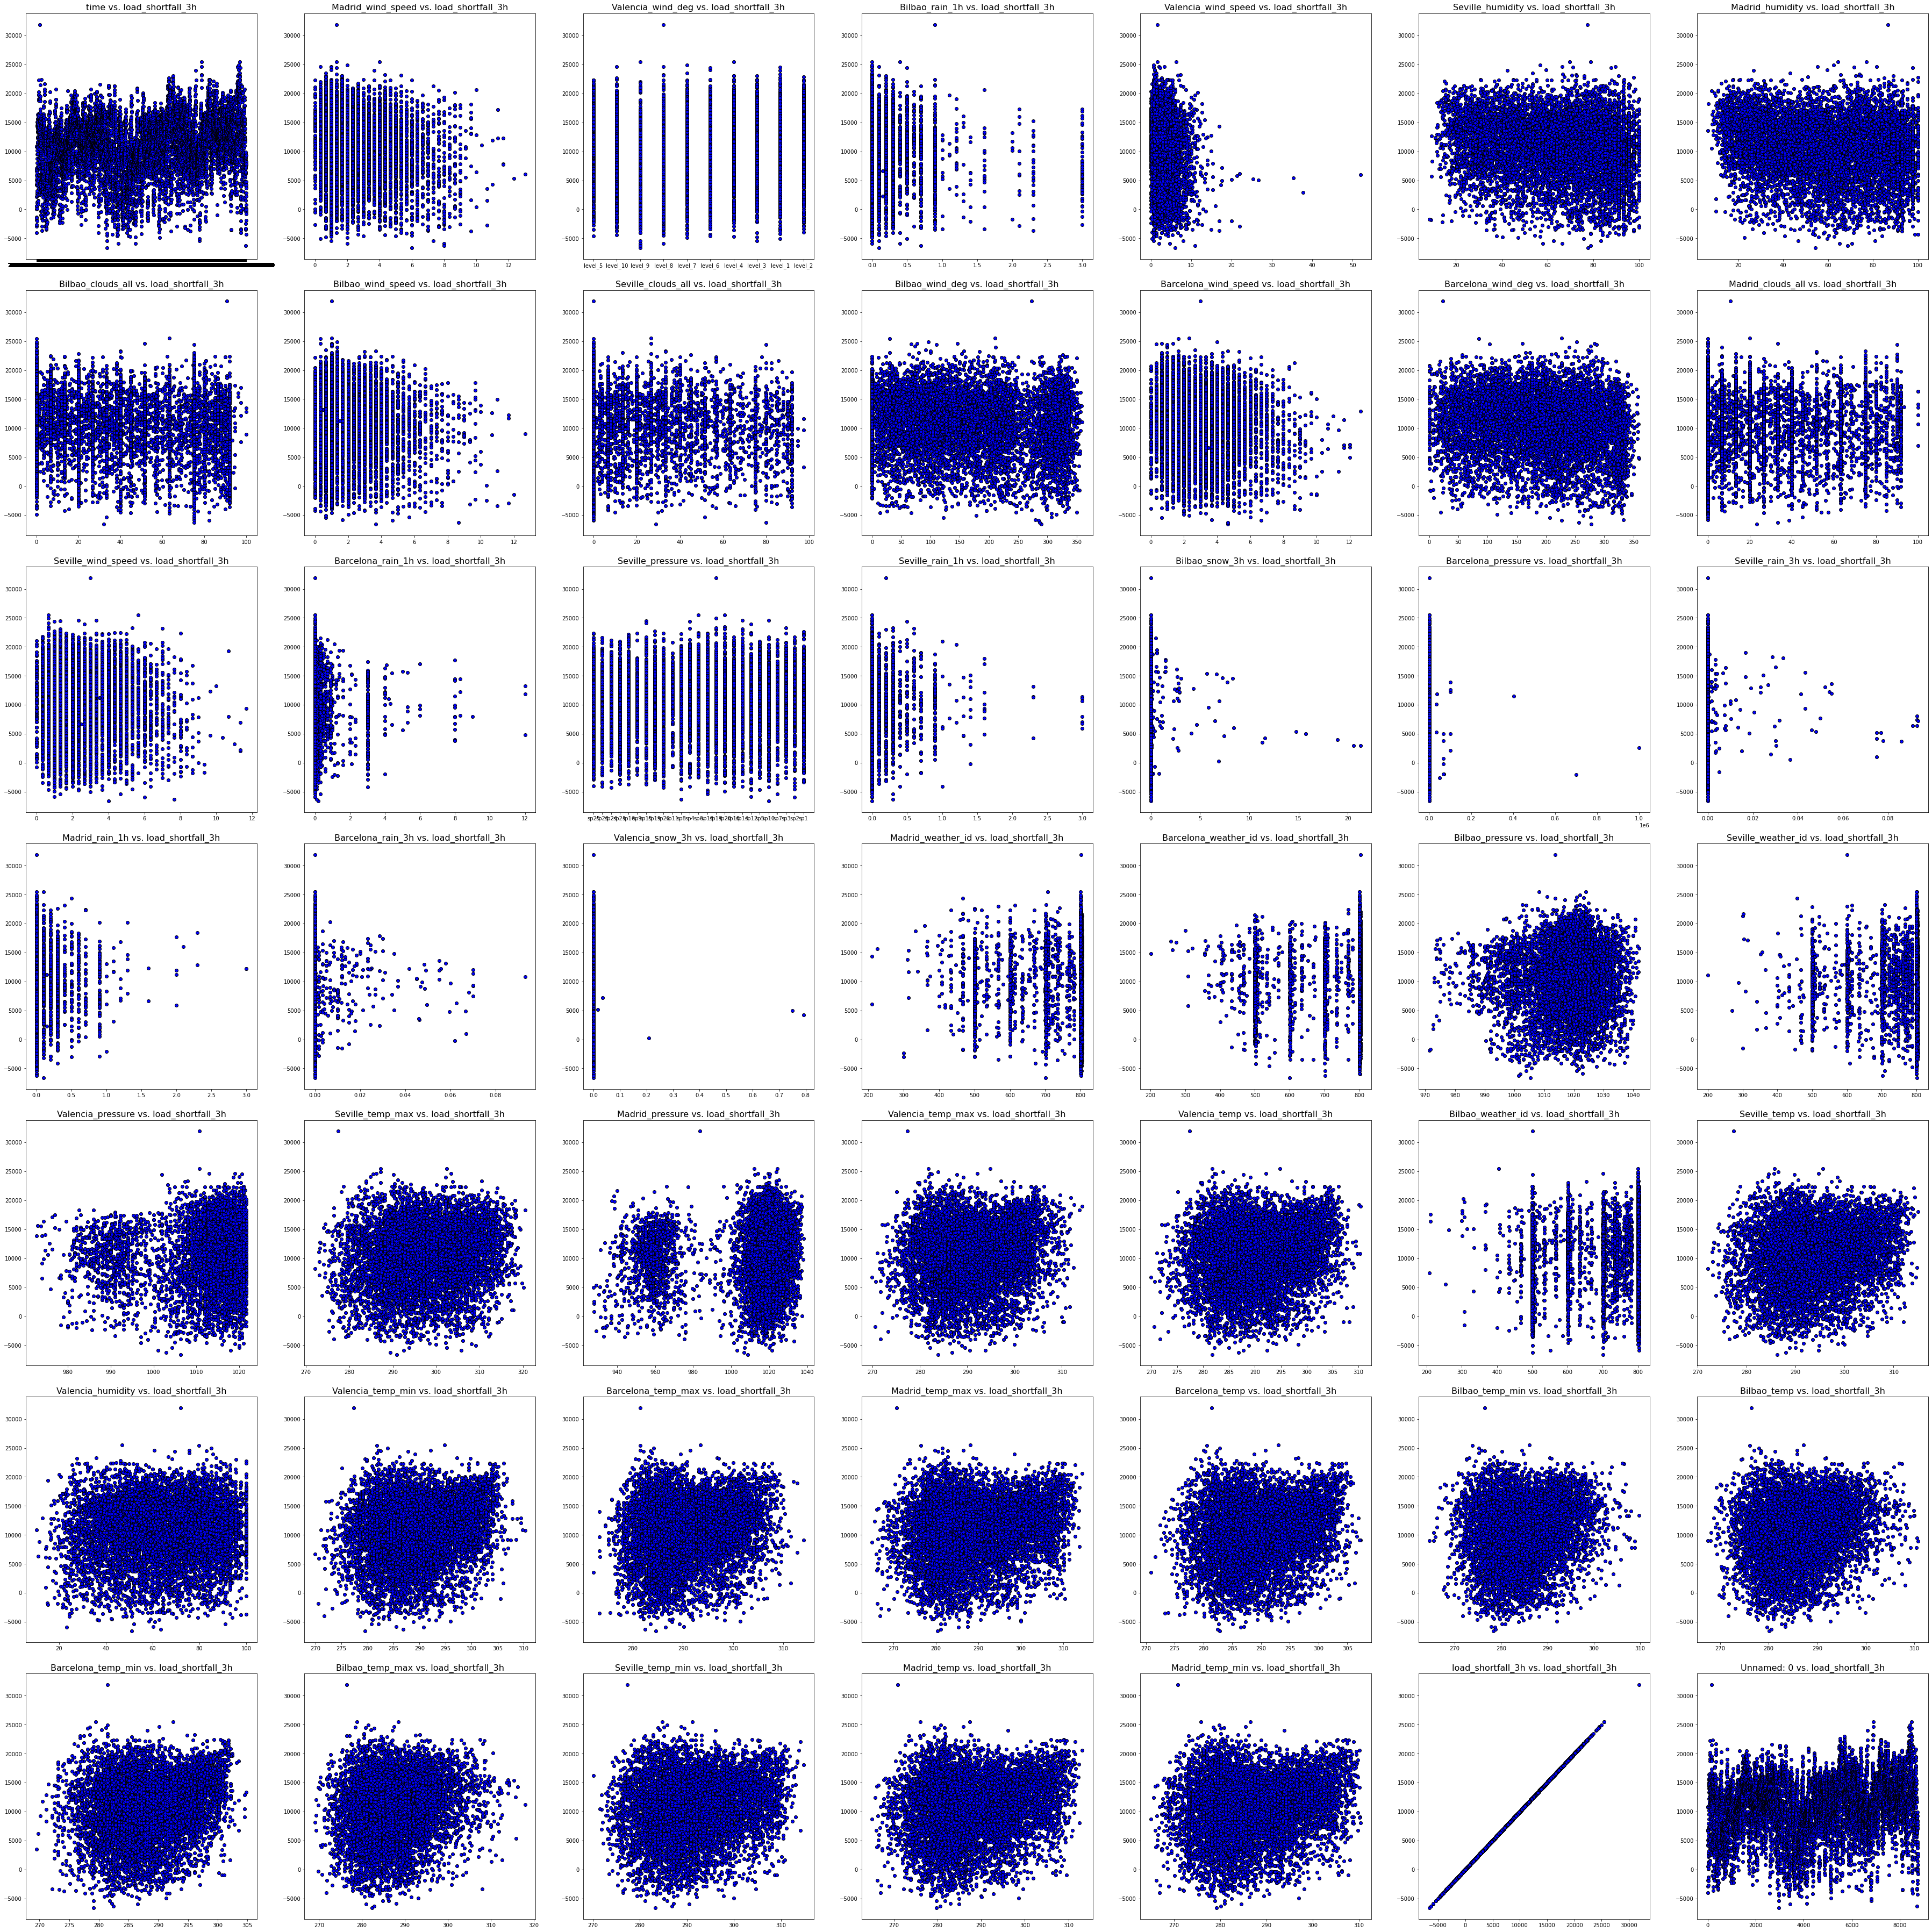

In [19]:
#Checking for Linearity
fig, axs = plt.subplots(7,7, figsize=(50,50),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=train[column],y=train['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

## ***Scatter Plot Linear vs Non-Linear Summary Analysis***

| Feature                 | Linear | Non-Linear |
| ----------------------- |--------|----------- |
| Time                    | Yes    | -          |
| Madrid_wind_speed       | Yes    | -          |
| Valencia_wind_deg       | Yes    | -          |
| Seville_humidity        | Yes    | -          |
| Madrid_humidity         | Yes    | -          |
| Bilboa_clouds_all       | Yes    | -          |
| Bilboa_wind_speed       | Yes    | -          |
| Seville_clouds_all      | Yes    | -          |
| Bilboa_wind_deg         | Yes    | -          |
| Barcelona_wind_speed    | Yes    | -          |
| Barcelona_wind_deg      | Yes    | -          |
| Seville Wind speed      | Yes    | -          |
| Barcelona Rain 1h       | -      | Yes        | 
| Seville Pressure        | Yes    | -          |
| Seville Rain 1h         | -      | Yes        | 
| Bilbao snow 3h          | -      | Yes        | 
| Barcelona Pressure      | -      | Yes        |
| Seville rain 3h         | -      | Yes        |
| Madrid Rain 1h          | -      | Yes        |
| Barcelona Rain 3h       | -      | Yes        | 
| Valencia snow 3h        | -      | Yes        |
| Madrid weather ID       | -      | Yes        |
| Barcelona weather ID    | -      | Yes        |
| Bilbao Pressure: Linear |  Yes   | -          |
| Seville weather ID      | -      | Yes        |
| Seville_weather_id      |  Yes   | -          |
| Valencia_pressure       |  -     | Yes        |
| Seville_temp_max        |  Yes   | -          |
| Madrid_pressure         |  -     | Yes        |
| Valencia_temp_max       |  Yes   | -          |
| Valencia_temp           |  Yes   | -          |
| Bilbao_weather_id       |  Yes   | -          |
| Seville_temp            |  Yes   | -          |
| Valencia_humidity       |  Yes   | -          |
| Valencia_temp_min       |  Yes   | -          |
| Barcelona_temp_max      |  Yes   | -          |
| Madrid_temp_max         |  Yes   | -          |
| Barcelona_temp          |  Yes   | -          |
| Bilbao_temp_min         |  Yes   | -          |
| Bilbao_temp             |  Yes   | -          |
| Barcelona_temp_min      |  Yes   | -          |
| Bilbao_temp_max         |  Yes   | -          |
| Seville_temp_min        |  Yes   | -          |
| Madrid_temp             |  Yes   | -          |
| Madrid_temp_min         |  Yes   | -          |
| load_shortfall_3h       |  Yes   | -          |
| Unamed : 0              |  Yes   | -          |


Keep in mind that the difference between linear and nonlinear is the form and not whether the data have curvature. Nonlinear regression is more flexible in the types of curvature it can fit because its form is not so restricted. In fact, both types of model can sometimes fit the same type of curvature.

#### ***CORRELATION HEATMAP***
- A correlation heatmap is a visual graphic that shows how each variable in the dataset are correlated to one another. -1 signifies zero correlation, while 1 signifies a perfect correlation
- We plotted the correlation of the train data before we processed the data to determine which data points are highly correlated and which are not correlated, this helped us determine which features to keep and which to exclude in the model selection. 
-	We looked at our target variable  which is our Load Shortfall and its distribution with an outline of what a normal distribution would look like and where the target variable is distributed.


C:\Users\User\AppData\Local\Temp\ipykernel_12592\2403176914.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1,cmap = 'Blues', annot=True)


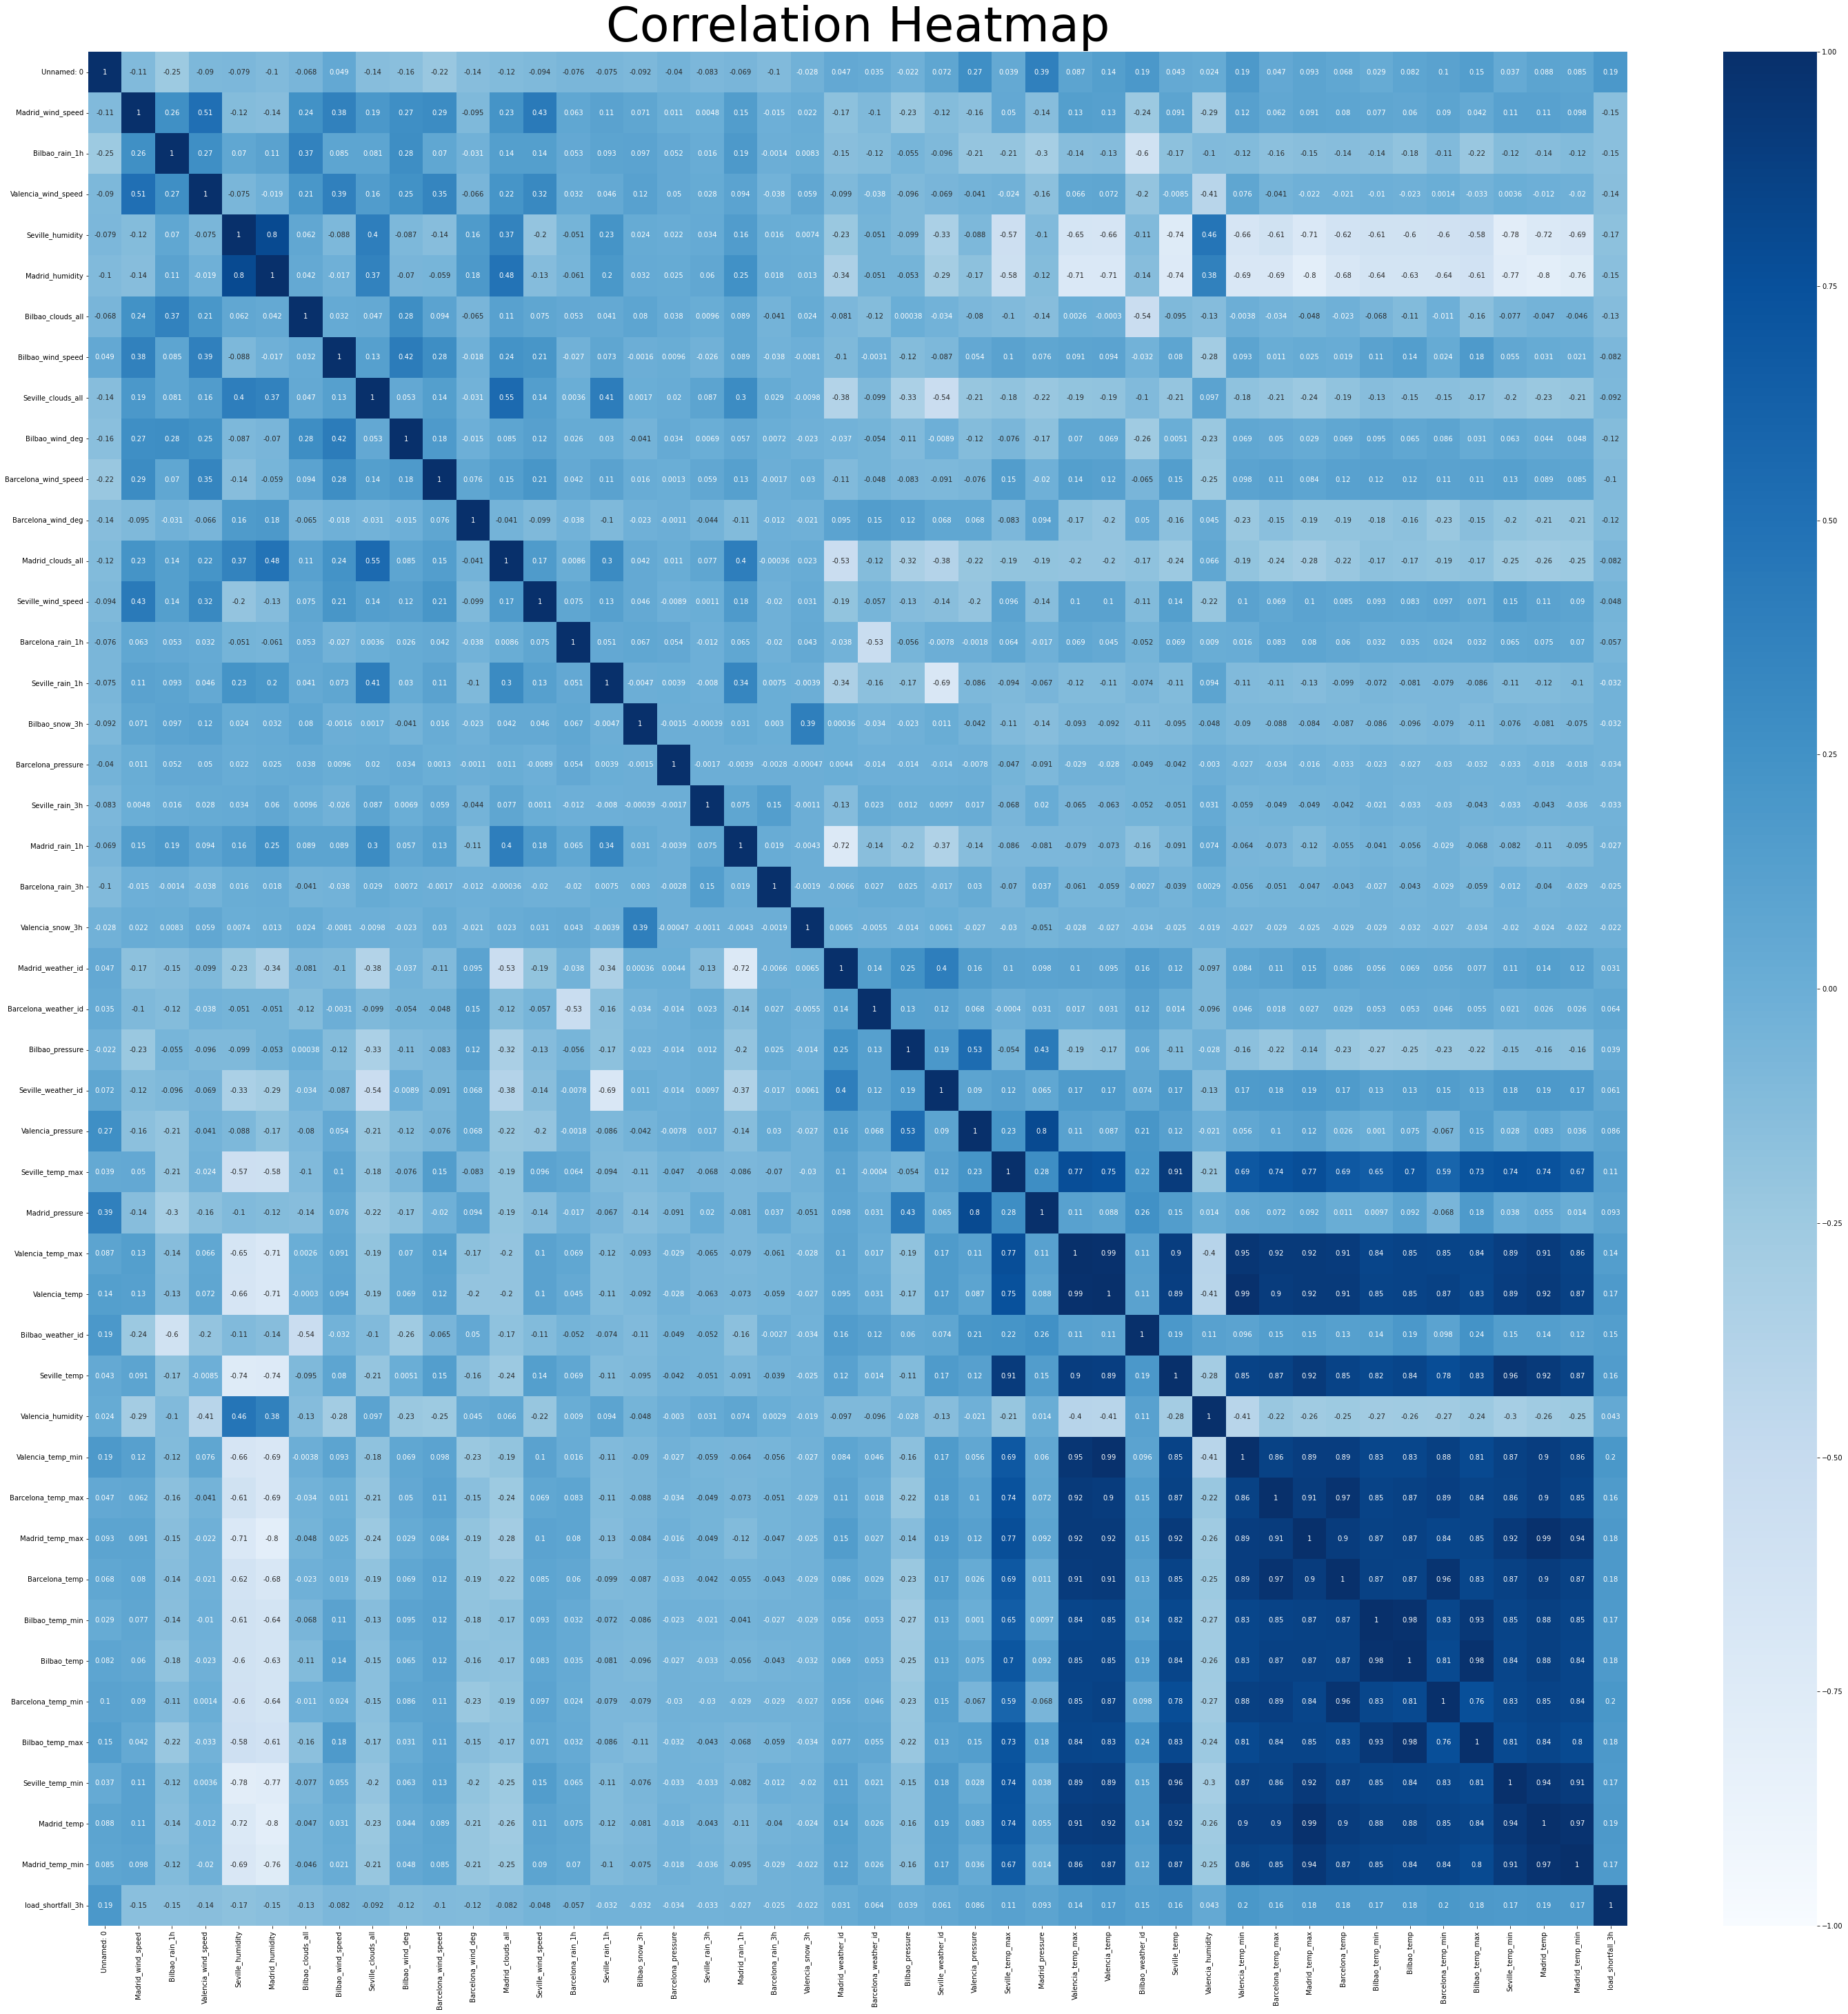

In [20]:
fig, ax = plt.subplots(figsize=(50, 50))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1,cmap = 'Blues', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':70}, pad=15);

 - we can easily tell the presence of high correlation (in dark blue) between features on the heatmap at the bottom right corner of our heatmap

#### ***Evaluate Correlation***
- The correlation coefficient determines how strong the relationship between two variables is. Its values range from -1.0 to 1.0, where -1.0 represents a perfect negative correlation and +1.0 represents a perfect positive relationship. It considers the relative movements in the variables and then defines if there is any relationship between them.

In [21]:
train.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

In [94]:
# Identify columns with a strong positive correlation (> 0.9)
dfCorr = train.corr()
filteredDf = dfCorr[(dfCorr >= 0.9) & (dfCorr != 1)]
filteredDf = filteredDf.dropna(how='all', axis=1)
filteredDf

C:\Users\User\AppData\Local\Temp\ipykernel_12592\217658470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = train.corr()


Seville_temp_max  Valencia_temp_max  Valencia_temp  \
Unnamed: 0                         NaN                NaN            NaN   
Madrid_wind_speed                  NaN                NaN            NaN   
Bilbao_rain_1h                     NaN                NaN            NaN   
Valencia_wind_speed                NaN                NaN            NaN   
Seville_humidity                   NaN                NaN            NaN   
Madrid_humidity                    NaN                NaN            NaN   
Bilbao_clouds_all                  NaN                NaN            NaN   
Bilbao_wind_speed                  NaN                NaN            NaN   
Seville_clouds_all                 NaN                NaN            NaN   
Bilbao_wind_deg                    NaN                NaN            NaN   
Barcelona_wind_speed               NaN                NaN            NaN   
Barcelona_wind_deg                 NaN                NaN            NaN   
Madrid_clouds_all                  NaN                NaN            NaN   
Seville_wind_speed                 NaN                NaN            NaN   
Barcelona_rain_1h                  NaN                NaN            NaN   
Seville_rain_1h                    NaN                NaN            NaN   
Bilbao_snow_3h                     NaN                NaN            NaN   
Barcelona_pressure                 NaN                NaN            NaN   
Seville_rain_3h                    NaN                NaN            NaN   
Madrid_rain_1h                     NaN                NaN            NaN   
Barcelona_rain_3h                  NaN                NaN            NaN   
Valencia_snow_3h                   NaN                NaN            NaN   
Madrid_weather_id                  NaN                NaN            NaN   
Barcelona_weather_id               NaN                NaN            NaN   
Bilbao_pressure                    NaN                NaN            NaN   
Seville_weather_id                 NaN                NaN            NaN   
Valencia_pressure                  NaN                NaN            NaN   
Seville_temp_max                   NaN                NaN            NaN   
Madrid_pressure                    NaN                NaN            NaN   
Valencia_temp_max                  NaN                NaN       0.987533   
Valencia_temp                      NaN           0.987533            NaN   
Bilbao_weather_id                  NaN                NaN            NaN   
Seville_temp                  0.907261                NaN            NaN   
Valencia_humidity                  NaN                NaN            NaN   
Valencia_temp_min                  NaN           0.949377       0.985479   
Barcelona_temp_max                 NaN           0.918256       0.901400   
Madrid_temp_max                    NaN           0.917838       0.917820   
Barcelona_temp                     NaN           0.912094       0.914601   
Bilbao_temp_min                    NaN                NaN            NaN   
Bilbao_temp                        NaN                NaN            NaN   
Barcelona_temp_min                 NaN                NaN            NaN   
Bilbao_temp_max                    NaN                NaN            NaN   
Seville_temp_min                   NaN                NaN            NaN   
Madrid_temp                        NaN           0.911331       0.915753   
Madrid_temp_min                    NaN                NaN            NaN   
load_shortfall_3h                  NaN                NaN            NaN   

                      Seville_temp  Valencia_temp_min  Barcelona_temp_max  \
Unnamed: 0                     NaN                NaN                 NaN   
Madrid_wind_speed              NaN                NaN                 NaN   
Bilbao_rain_1h                 NaN                NaN                 NaN   
Valencia_wind_speed            NaN                NaN                 NaN   
Seville_humidity               NaN                NaN           

#### ***Below is the summarised list of the correlated variables***

In [23]:
filteredDf.T

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Seville_temp_max           NaN                NaN             NaN   
Valencia_temp_max          NaN                NaN             NaN   
Valencia_temp              NaN                NaN             NaN   
Seville_temp               NaN                NaN             NaN   
Valencia_temp_min          NaN                NaN             NaN   
Barcelona_temp_max         NaN                NaN             NaN   
Madrid_temp_max            NaN                NaN             NaN   
Barcelona_temp             NaN                NaN             NaN   
Bilbao_temp_min            NaN                NaN             NaN   
Bilbao_temp                NaN                NaN             NaN   
Barcelona_temp_min         NaN                NaN             NaN   
Bilbao_temp_max            NaN                NaN             NaN   
Seville_temp_min           NaN                NaN             NaN   
Madrid_temp                NaN                NaN             NaN   
Madrid_temp_min            NaN                NaN             NaN   

                    Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Seville_temp_max                    NaN               NaN              NaN   
Valencia_temp_max                   NaN               NaN              NaN   
Valencia_temp                       NaN               NaN              NaN   
Seville_temp                        NaN               NaN              NaN   
Valencia_temp_min                   NaN               NaN              NaN   
Barcelona_temp_max                  NaN               NaN              NaN   
Madrid_temp_max                     NaN               NaN              NaN   
Barcelona_temp                      NaN               NaN              NaN   
Bilbao_temp_min                     NaN               NaN              NaN   
Bilbao_temp                         NaN               NaN              NaN   
Barcelona_temp_min                  NaN               NaN              NaN   
Bilbao_temp_max                     NaN               NaN              NaN   
Seville_temp_min                    NaN               NaN              NaN   
Madrid_temp                         NaN               NaN              NaN   
Madrid_temp_min                     NaN               NaN              NaN   

                    Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
Seville_temp_max                  NaN                NaN                 NaN   
Valencia_temp_max                 NaN                NaN                 NaN   
Valencia_temp                     NaN                NaN                 NaN   
Seville_temp                      NaN                NaN                 NaN   
Valencia_temp_min                 NaN                NaN                 NaN   
Barcelona_temp_max                NaN                NaN                 NaN   
Madrid_temp_max                   NaN                NaN                 NaN   
Barcelona_temp                    NaN                NaN                 NaN   
Bilbao_temp_min                   NaN                NaN                 NaN   
Bilbao_temp                       NaN                NaN                 NaN   
Barcelona_temp_min                NaN                NaN                 NaN   
Bilbao_temp_max                   NaN                NaN                 NaN   
Seville_temp_min                  NaN                NaN                 NaN   
Madrid_temp                       NaN                NaN                 NaN   
Madrid_temp_min                   NaN                NaN                 NaN   

                    Bilbao_wind_deg  ...  Madrid_temp_max  Barcelona_temp  \
Seville_temp_max                NaN  ...              NaN             NaN   
Valencia_temp_max               NaN  ...         0.917838        0.912094   
Valencia_temp                   NaN  ...         0.917820        0.914601   
Seville_temp                    NaN  ...         0.920908             NaN   


In [24]:
filteredDf.T.shape

(15, 46)

In [25]:
filteredDf.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Seville_temp_max to Madrid_temp_min
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            0 non-null      float64
 1   Madrid_wind_speed     0 non-null      float64
 2   Bilbao_rain_1h        0 non-null      float64
 3   Valencia_wind_speed   0 non-null      float64
 4   Seville_humidity      0 non-null      float64
 5   Madrid_humidity       0 non-null      float64
 6   Bilbao_clouds_all     0 non-null      float64
 7   Bilbao_wind_speed     0 non-null      float64
 8   Seville_clouds_all    0 non-null      float64
 9   Bilbao_wind_deg       0 non-null      float64
 10  Barcelona_wind_speed  0 non-null      float64
 11  Barcelona_wind_deg    0 non-null      float64
 12  Madrid_clouds_all     0 non-null      float64
 13  Seville_wind_speed    0 non-null      float64
 14  Barcelona_rain_1h     0 non-null      float64
 15  Se

In [26]:
filteredDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Unnamed: 0 to load_shortfall_3h
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seville_temp_max    1 non-null      float64
 1   Valencia_temp_max   6 non-null      float64
 2   Valencia_temp       6 non-null      float64
 3   Seville_temp        4 non-null      float64
 4   Valencia_temp_min   2 non-null      float64
 5   Barcelona_temp_max  4 non-null      float64
 6   Madrid_temp_max     8 non-null      float64
 7   Barcelona_temp      6 non-null      float64
 8   Bilbao_temp_min     2 non-null      float64
 9   Bilbao_temp         2 non-null      float64
 10  Barcelona_temp_min  1 non-null      float64
 11  Bilbao_temp_max     2 non-null      float64
 12  Seville_temp_min    4 non-null      float64
 13  Madrid_temp         7 non-null      float64
 14  Madrid_temp_min     3 non-null      float64
dtypes: float64(15)
memory usage: 6.8+ KB


In [27]:
filteredDf.columns

Index(['Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp',
       'Seville_temp', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'],
      dtype='object')

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

**Data engineering is the complex task of making raw data usable for us to use**

- Below we will be working on the data mining, this is the process of rigorously cleaning our data and ensuring our data is usable and can be inputted into a model that will be able to interpret the data. 
- Cleaning the data is also important because it improves the data quality With cleaning data all the outdated or irrelevent information is gone – leaving us with the highest quality information.

We have highlighted some key points to consider
- Handling missing values
- Handling outliers
- Time Stamp Data Manipulation



#### ***ASSIGN DATAFRAMES TO BE CLEANED***

In [28]:
# assign dataframes to be cleaned
clean_train = train.copy()
clean_test = test.copy()

#### ***Fill in null values***

In [29]:
# Fill null values in "Valencia_pressure" column of train data set with "Valencia_pressure" mean 
clean_train["Valencia_pressure"] = clean_train["Valencia_pressure"].fillna(clean_train["Valencia_pressure"].mean())

In [30]:
# Fill null values in "Valencia_pressure" column of test data set with "Valencia_pressure" mean 
clean_test["Valencia_pressure"] = clean_test["Valencia_pressure"].fillna(clean_test["Valencia_pressure"].mean())

#### ***Extract numbers from object columns and convert to numeric***

In [31]:
# Remove non-numbers in "Valencia_wind_deg" column in train data set
clean_train["Valencia_wind_deg"] = clean_train["Valencia_wind_deg"].str.extract("(\d+)")

In [32]:
# Remove non-numbers in "Valencia_wind_deg" column in test data set
clean_test["Valencia_wind_deg"] = clean_test["Valencia_wind_deg"].str.extract("(\d+)")

#### ***Change data type to numerical***

In [33]:
# Change data type to numeric
clean_train["Valencia_wind_deg"] = pd.to_numeric(clean_train["Valencia_wind_deg"])

In [34]:
# Change data type to numeric
clean_test["Valencia_wind_deg"] = pd.to_numeric(clean_test["Valencia_wind_deg"])

#### ***Remove non-numbers in data set***

In [35]:
# Remove non-numbers in "Seville_pressure" column in train data set
clean_train["Seville_pressure"] = clean_train["Seville_pressure"].str.extract("(\d+)")

In [36]:
# Remove non-numbers in "Seville_pressure" column in test data set
clean_test["Seville_pressure"] = clean_test["Seville_pressure"].str.extract("(\d+)")

In [37]:
# Change data type to numeric
clean_train["Seville_pressure"] = pd.to_numeric(clean_train["Seville_pressure"])

In [38]:
# Change data type to numeric
clean_test["Seville_pressure"] = pd.to_numeric(clean_test["Seville_pressure"])

#### ***Convert Max/Min temp in to range***

In [39]:
clean_train["Madrid_temp_range"] = clean_train["Madrid_temp_max"]-clean_train["Madrid_temp_min"]
clean_test["Madrid_temp_range"] = clean_test["Madrid_temp_max"]-clean_test["Madrid_temp_min"]

clean_train["Seville_temp_range"] = clean_train["Seville_temp_max"]-clean_train["Seville_temp_min"]
clean_test["Seville_temp_range"] = clean_test["Seville_temp_max"]-clean_test["Seville_temp_min"]

clean_train["Bilbao_temp_range"] = clean_train["Bilbao_temp_max"]-clean_train["Bilbao_temp_min"]
clean_test["Bilbao_temp_range"] = clean_test["Bilbao_temp_max"]-clean_test["Bilbao_temp_min"]

clean_train["Barcelona_temp_range"] = clean_train["Barcelona_temp_max"]-clean_train["Barcelona_temp_min"]
clean_test["Barcelona_temp_range"] = clean_test["Barcelona_temp_max"]-clean_test["Barcelona_temp_min"]

clean_train["Valencia_temp_range"] = clean_train["Valencia_temp_max"]-clean_train["Valencia_temp_min"]
clean_test["Valencia_temp_range"] = clean_test["Valencia_temp_max"]-clean_test["Valencia_temp_min"]

## ***Time Stamp data manipulation***

The time data feature is an object. This feature needs to be modified to provide useful information that can be used as inputs into the model.

To give you a practical example of how we ensured data integrity, think about timestamp data. In order for the model to use such information, the model actually needs to separate and extract the hours, days, months and years into their own columns. 

In [40]:
# convert time feature from object to datetime type
clean_train["time"] = pd.to_datetime(clean_train["time"])
clean_test["time"] = pd.to_datetime(clean_test["time"])

The time stamp data offers a range of information that can be used to interpret energy load timing trends.
Trends over time by year, month and day. The week of the year and actual day of the day as well as day of the week or even a week day vs weekend as well as start of the month or month end indicators may prove useful.
Actual time information like hour, minutes, seconds or even the classified time of day could reveal further insights.

In [41]:
# insert new time columns
 # extract information from time stamp data
 
# year
clean_train["Year"] = clean_train["time"].dt.year
clean_test["Year"] = clean_test["time"].dt.year

# month
clean_train["Month_Num"] = clean_train["time"].dt.month
clean_test["Month_Num"] = clean_test["time"].dt.month

# day information: day of the year, day name, actual day date, day of the week, indicator for week/weekend
clean_train["Day_Num_of_Year"] = clean_train["time"].dt.day_of_year
clean_test["Day_Num_of_Year"] = clean_test["time"].dt.day_of_year
clean_train["Day_Date"] = clean_train["time"].dt.day
clean_test["Day_Date"] = clean_test["time"].dt.day
clean_train["Day_of_Week"] = clean_train["time"].dt.day_of_week
clean_test["Day_of_Week"] = clean_test["time"].dt.day_of_week
clean_train["Week_Day"] = clean_train["Day_of_Week"].apply(lambda x: 1 if x <= 4 else 0)
clean_test["Week_Day"] = clean_test["Day_of_Week"].apply(lambda x: 1 if x <= 4 else 0)
clean_train["Weekend"] = clean_train["Day_of_Week"].apply(lambda x: 1 if x > 4 else 0)
clean_test["Weekend"] = clean_test["Day_of_Week"].apply(lambda x: 1 if x > 4 else 0)

# time information: hour, minute, second
clean_train["Hour"] = clean_train["time"].dt.hour
clean_test["Hour"] = clean_test["time"].dt.hour


# time of day indicators: AM/PM, morning/afternoon/evening/night
clean_train["AM"] = clean_train["Hour"].apply(lambda x: 1 if x >= 0 and x < 12 else 0)
clean_test["AM"] = clean_test["Hour"].apply(lambda x: 1 if x >= 0 and x < 12 else 0)
clean_train["PM"] = clean_train["Hour"].apply(lambda x: 1 if x >= 12 and x <= 23 else 0)
clean_test["PM"] = clean_test["Hour"].apply(lambda x: 1 if x >= 12 and x <= 23 else 0)

# time of month indicators: start or end of month
clean_train["Day_Month_Start_0"] = clean_train["time"].dt.is_month_start
clean_test["Day_Month_Start_0"] = clean_test["time"].dt.is_month_start
clean_train["Day_Month_Start"] = clean_train["Day_Month_Start_0"].apply(lambda x: 1 if x == True else 0)
clean_test["Day_Month_Start"] = clean_test["Day_Month_Start_0"].apply(lambda x: 1 if x == True else 0)
clean_train["Day_Month_End_0"] = clean_train["time"].dt.is_month_end
clean_test["Day_Month_End_0"] = clean_test["time"].dt.is_month_end
clean_train["Day_Month_End"] = clean_train["Day_Month_End_0"].apply(lambda x: 1 if x == True else 0)
clean_test["Day_Month_End"] = clean_test["Day_Month_End_0"].apply(lambda x: 1 if x == True else 0)


In [42]:
# engineer existing features
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   int64         
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

### ***Remove unnecessary columns***

Think about this. If you are an electricity provider. Knowing the name and surname of customers is not necessary when it comes to predicting their electricity usage. Therefore, just because you have access to certain types of information doesn’t mean you have to use it. Using robust techniques the relevant data from the dataset was identified. This means that we have removed the unnecessary information that would not have improved our model predictions. 


In [43]:
clean_train = clean_train.drop(["Unnamed: 0", "time", "Day_Month_Start_0", "Day_Month_End_0", "Madrid_temp", "Madrid_temp_min", "Seville_temp", "Seville_temp_min", "Seville_temp_max", "Barcelona_temp","Barcelona_temp_min", "Bilbao_temp", "Bilbao_temp_min", "Bilbao_temp_max", "Madrid_temp_max", "Barcelona_temp_max", "Valencia_temp", "Valencia_temp_min", "Valencia_temp_max"], axis = 1)
clean_test = clean_test.drop(["Unnamed: 0", "time", "Day_Month_Start_0", "Day_Month_End_0", "Madrid_temp", "Madrid_temp_min", "Seville_temp", "Seville_temp_min", "Seville_temp_max", "Barcelona_temp", "Barcelona_temp_min", "Bilbao_temp", "Bilbao_temp_min", "Bilbao_temp_max", "Madrid_temp_max", "Barcelona_temp_max", "Valencia_temp", "Valencia_temp_min", "Valencia_temp_max"], axis = 1)

#### ***Remove Outliers***
An outlier is an item that is abnormally different from the rest of the dataset.

Sometimes information can be incomplete. However, some information could be considered “too complete” and we get some funny values. Why would this be an issue? Well, if there are extreme values, it influences how the model uses the data to predict outcomes. Remember, GIGO (Garbage In, Garbage Out), so these funnies, called outliers, need to be removed. Once again, to ensure data integrity, the appropriate techniques were applied to account for these outliers.


In [44]:
# function to remove outliers
def remove_outliers(df, columns, n_std):
    for col in columns:
        
        # setup variables for outlier consideration
        check_kurtosis = df[col].kurtosis()
        mean = df[col].mean()
        sd = df[col].std()
        
        # apply kurtosis check 
        if check_kurtosis > 3:
            # remove outliers
            df = df[(df[col] >= mean - (n_std*sd)) & (df[col] <= mean + (n_std*sd))] 
    
    return df


In [45]:
# apply remove_outliers function
df_train_RO = clean_train

# identify columns from dataframe
column_list = clean_train.iloc[:, (np.where((clean_train.dtypes == np.int64) | (clean_train.dtypes == np.float64)))[0]].columns 

# call remove_outliers function
df_train_RO_2 = remove_outliers(df_train_RO, column_list, 3)
df_train_RO_2.describe()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
count        5725.000000        5725.000000     5725.000000   
mean            2.117787           5.094672        0.065607   
std             1.621638           2.846059        0.161348   
min             0.000000           1.000000        0.000000   
25%             1.000000           3.000000        0.000000   
50%             1.666667           5.000000        0.000000   
75%             2.666667           7.000000        0.000000   
max            11.666667          10.000000        1.200000   

       Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
count          5725.000000       5725.000000      5725.000000   
mean              2.269840         60.113013        54.408821   
std               1.798402         22.469509        24.025878   
min               0.000000          8.333333         6.333333   
25%               1.000000         42.000000        34.000000   
50%               1.666667         61.666667        53.666667   
75%               3.333333         79.333333        75.333333   
max               9.333333        100.000000       100.000000   

       Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
count        5725.000000        5725.000000         5725.000000   
mean           40.054207           1.687948            8.311441   
std            32.211095           1.429490           18.570628   
min             0.000000           0.000000            0.000000   
25%             6.666667           0.666667            0.000000   
50%            40.000000           1.000000            0.000000   
75%            75.000000           2.333333            6.666667   
max           100.000000           6.666667           92.000000   

       Bilbao_wind_deg  ...  Day_Num_of_Year     Day_Date  Day_of_Week  \
count      5725.000000  ...      5725.000000  5725.000000  5725.000000   
mean        149.563377  ...       193.549520    15.743930     2.979913   
std         100.706725  ...       105.734059     8.279856     2.004131   
min           0.000000  ...         2.000000     2.000000     0.000000   
25%          67.333333  ...       104.000000     9.000000     1.000000   
50%         130.000000  ...       202.000000    16.000000     3.000000   
75%         221.333333  ...       284.000000    23.000000     5.000000   
max         359.333333  ...       365.000000    30.000000     6.000000   

          Week_Day      Weekend         Hour           AM           PM  \
count  5725.000000  5725.000000  5725.000000  5725.000000  5725.000000   
mean      0.716681     0.283319    10.388646     0.506900     0.493100   
std       0.450649     0.450649     6.894917     0.499996     0.499996   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     3.000000     0.000000     0.000000   
50%       1.000000     0.000000     9.000000     1.000000     0.000000   
75%       1.000000     1.000000    15.000000     1.000000     1.000000   
max       1.000000     1.000000    21.000000     1.000000     1.000000   

       Day_Month_Start  Day_Month_End  
count           5725.0         5725.0  
mean               0.0            0.0  
std                0.0            0.0  
min                0.0            0.0  
25%                0.0            0.0  
50%                0.0            0.0  
75%                0.0            0.0  
max                0.0            0.0  

[8 rows x 49 columns]

In [46]:
# Create a copy of the train dataset to work on
clean_train = df_train_RO_2.copy()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

What has been described up until now is what is known in "the biz" as exploratory data analysis and feature engineering. These processes form the foundation work before any model building can begin.  An explanation of how the models work and what measures we use to evaluate whether the model prediction is good or not.

To ensure a robust modeling process, four different types of models were developed to determine the shortfall predictions. 

***Model Building***
- We will split the data into train and test, to be able to evaluate the model that we build on the train data.
- Build a Linear Regression model which would serve as our base model using the train data.
- Improve the linear model by employing Lasso and Ridge Regression
- Try out other models like decision trees, Random Forest and SVR
- Thereafter we will assess which trained model produces the best results.

In [47]:
# Split data into train and test
X = clean_train.drop(['load_shortfall_3h'], axis=1)
y = clean_train['load_shortfall_3h']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

- We made use of the train_test_split syntax from the **sklearn library** to carry out the splitting

In [48]:
#checking the shape of the training and testing data

print('Training predictor:', x_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', x_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (4580, 48)
Training target: (4580,)
Testing predictor: (1145, 48)
Testing target: (1145,)


- We have been able to allocate **4580** observations to the training set of our data.
- We have also allocated the remainder **1145** of observations to the testing set of our data.
N/B: These values are a result of the splitting ratio carried out, it is important to note that any change in the splitting ration would affect the value and shape of the training and testing datasets

## ***Linear Regression Model***

The first model is the linear regression model. This model is the most basic and commonly used model in predictive analysis. It generates a single line that fits data used to predict with.

In [49]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = clean_train.drop(['load_shortfall_3h'], axis=1)
y = clean_train['load_shortfall_3h']

In [50]:
# create model object
lr = LinearRegression()

In [51]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [52]:
# train model
lr.fit(x_train, y_train)
preds = lr.predict(x_train)
print("Training:")
# Calculate the mean-squared-error
MVRM_MSE_train = np.sqrt(metrics.mean_squared_error(y_train, preds))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_train, preds)))
# Calculate the R-squared metric
MVRM_R2_train = metrics.r2_score(y_train, preds)
print('R_squared:', metrics.r2_score(y_train, preds))

Training:
MSE: 4431.693055442447
R_squared: 0.2473159034222946


In [53]:
print(clean_train.columns.values)
print(len(clean_train.columns))

['Madrid_wind_speed' 'Valencia_wind_deg' 'Bilbao_rain_1h'
 'Valencia_wind_speed' 'Seville_humidity' 'Madrid_humidity'
 'Bilbao_clouds_all' 'Bilbao_wind_speed' 'Seville_clouds_all'
 'Bilbao_wind_deg' 'Barcelona_wind_speed' 'Barcelona_wind_deg'
 'Madrid_clouds_all' 'Seville_wind_speed' 'Barcelona_rain_1h'
 'Seville_pressure' 'Seville_rain_1h' 'Bilbao_snow_3h'
 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Valencia_pressure' 'Madrid_pressure' 'Bilbao_weather_id'
 'Valencia_humidity' 'load_shortfall_3h' 'Madrid_temp_range'
 'Seville_temp_range' 'Bilbao_temp_range' 'Barcelona_temp_range'
 'Valencia_temp_range' 'Year' 'Month_Num' 'Day_Num_of_Year' 'Day_Date'
 'Day_of_Week' 'Week_Day' 'Weekend' 'Hour' 'AM' 'PM' 'Day_Month_Start'
 'Day_Month_End']
49


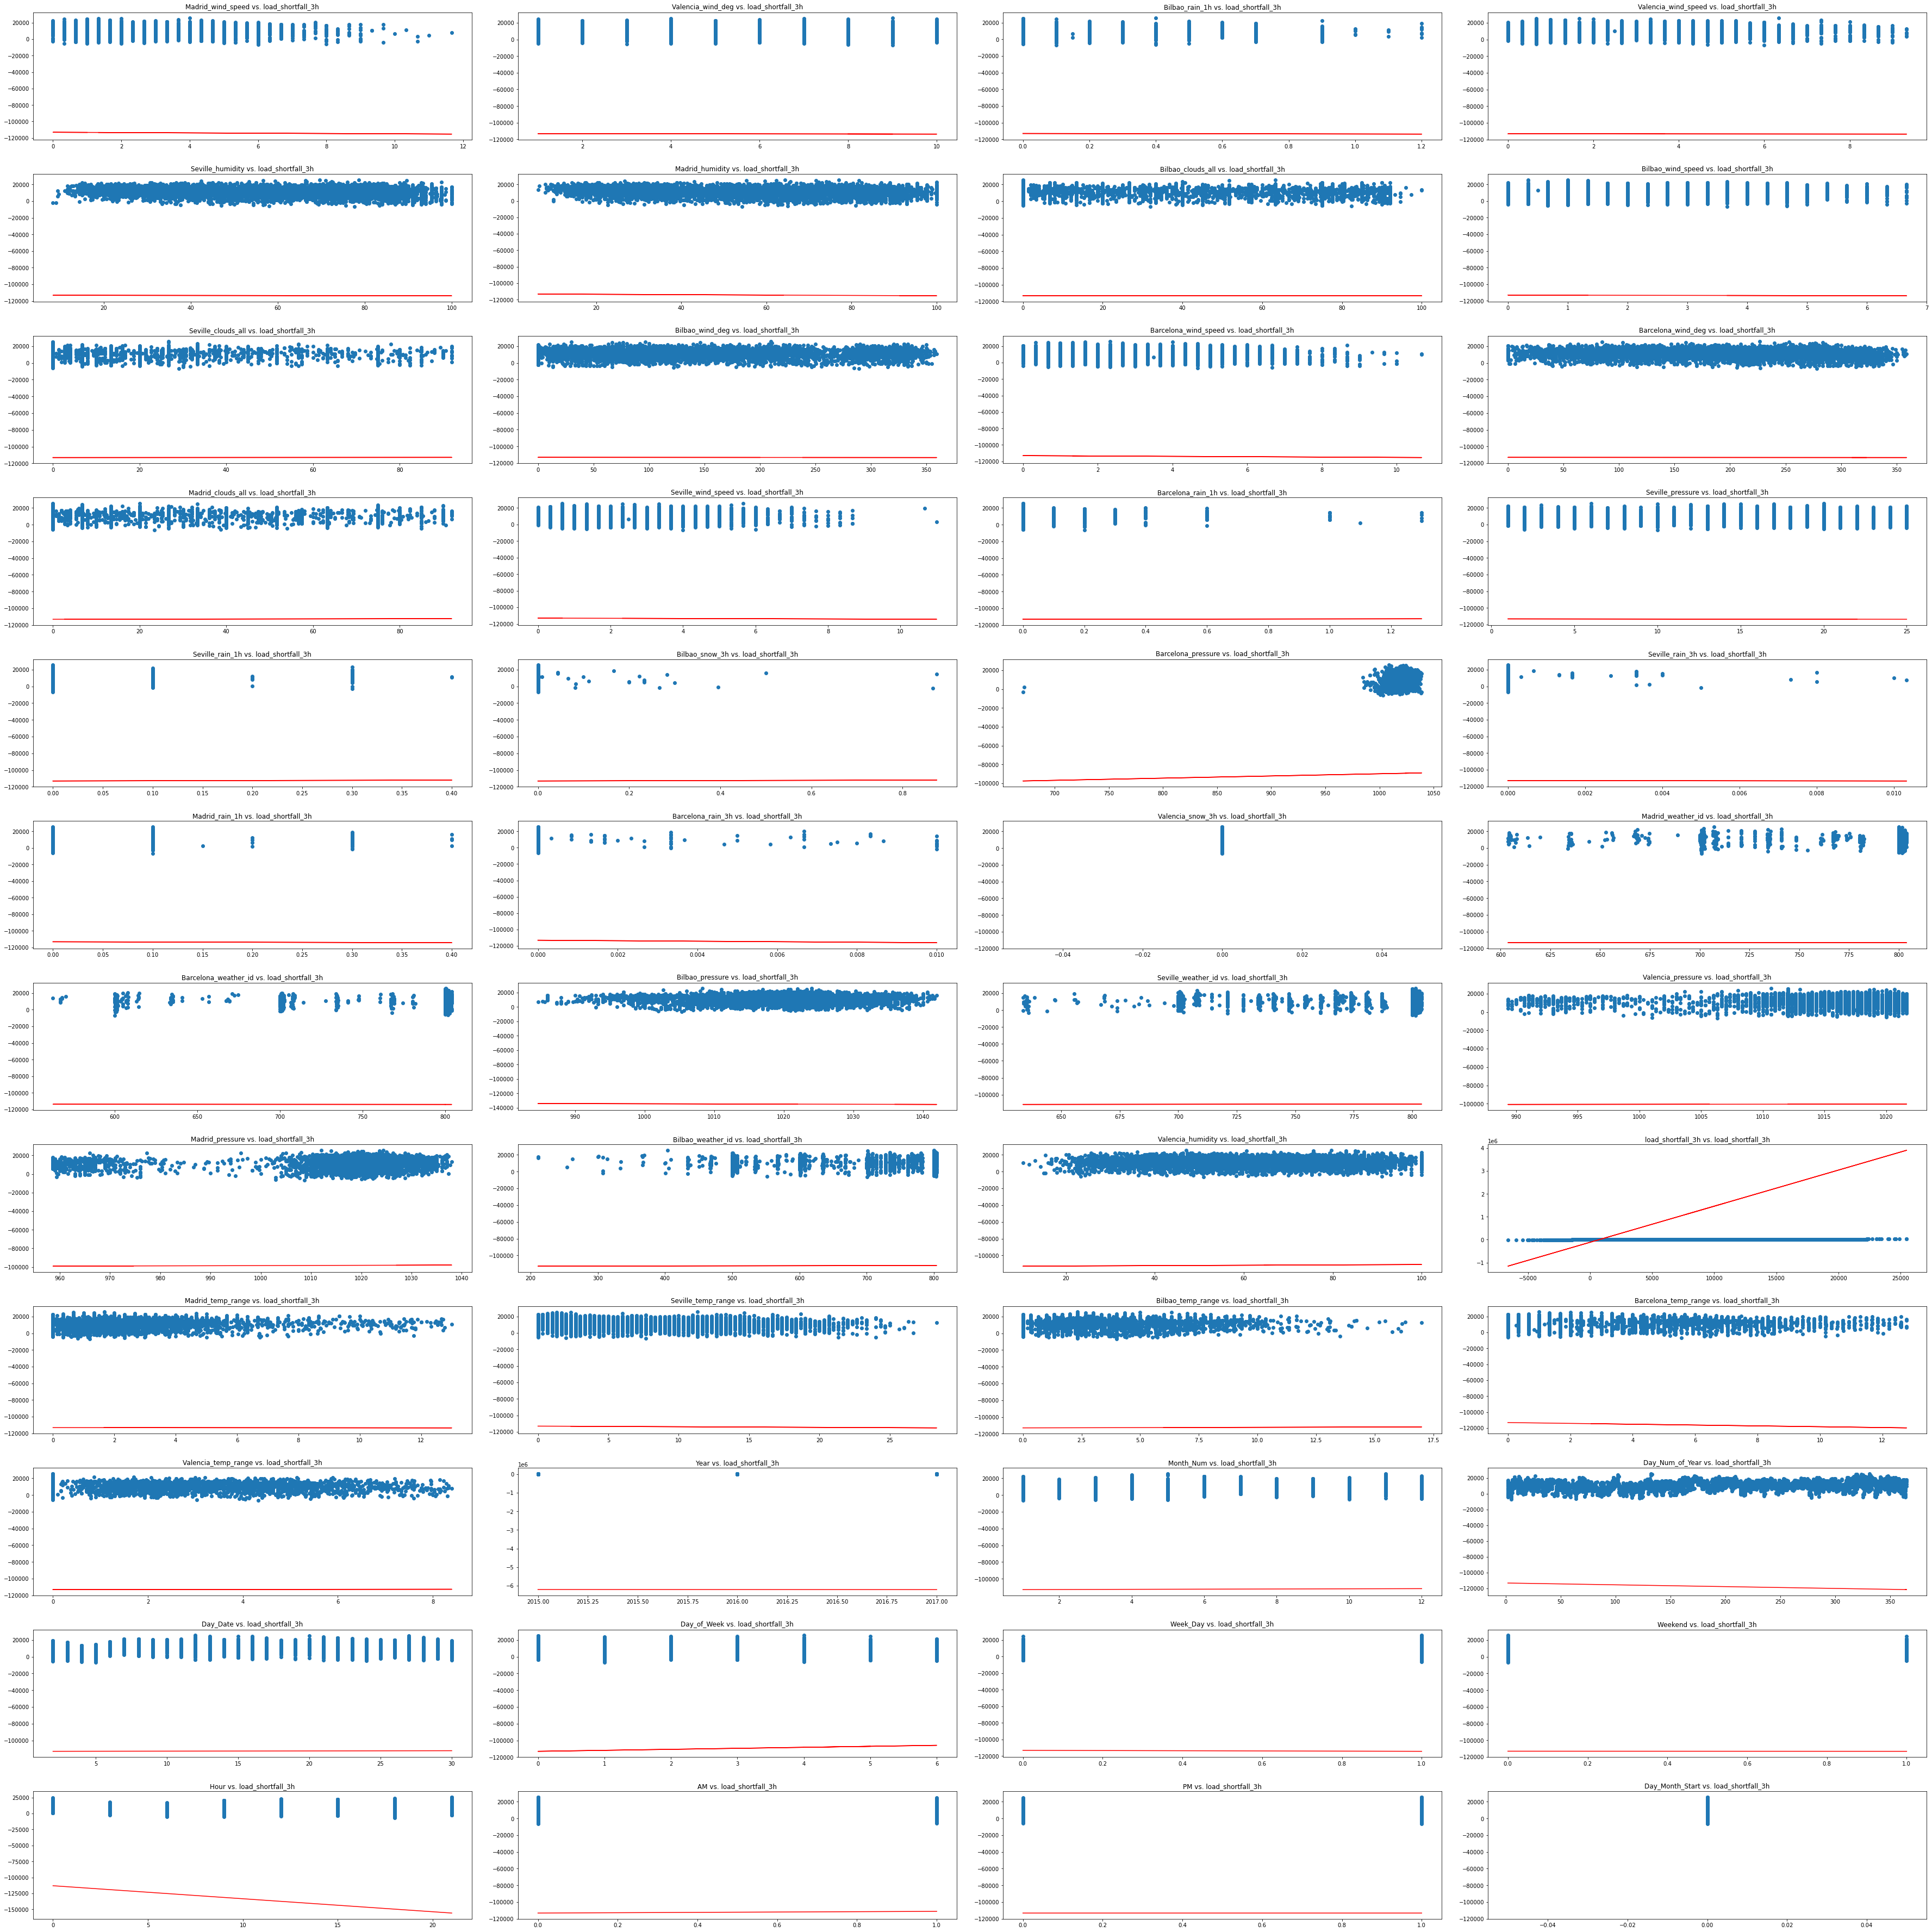

In [54]:
# visualise training regression model
fig, axs = plt.subplots(12, 4, figsize=(50,50))

counter = -1
row_pos = 0

for index, column in enumerate(clean_train.columns):

    if index <= 47:

        counter = counter + 1
        if counter % 4 == 0:
            row_pos = row_pos + 1
            col_pos = 0

        axs[row_pos - 1, col_pos].scatter(clean_train[column], clean_train['load_shortfall_3h'])
        axs[row_pos - 1, col_pos].plot(clean_train[column], lr.intercept_ + lr.coef_[index]*clean_train[column], color='red')
        axs[row_pos - 1, col_pos].title.set_text(column + ' vs. load_shortfall_3h')
        
        col_pos = col_pos + 1

fig.tight_layout(pad=3.0)

plt.show()


#### ***Generate values of y from x, using the linear model***

In [55]:
# Generate values of y from x, using the linear model
gen_y_test = lr.predict(x_test)

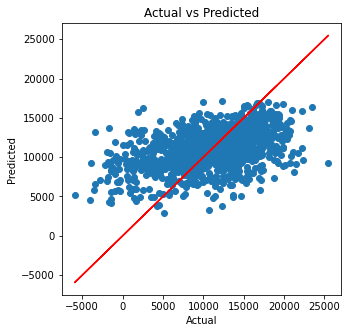

In [56]:
# visualise actual vs predicted outcomes from regression model
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,gen_y_test)
ax.plot(y_test,y_test,'r')
plt.show()

In [57]:
print("Testing:")
MVRM_MSE_test = np.sqrt(metrics.mean_squared_error(y_test, gen_y_test))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, gen_y_test)))
MVRM_R2_test = metrics.r2_score(y_test, gen_y_test)
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 4689.312311128973
R_squared: 0.18402040153465593


The linear regression model was very simple to implement and it produced an error value of 4689 and an R squared value of 0.18. This meant that only 18% of the predictions could be explained by the model. 

## ***Support Vector Regressor***

The next model is the Support Vector Regressor. This model differs from the simple linear regression model as it allows us to choose how tolerant we are of errors. The basic idea behind the support vector is that it finds a line of best fit that is a hyperplane and not just a single line. 

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points, So the aim is to fit as many instances as possible between the lines while limiting the margin violations

In [58]:
sv_reg = SVR(kernel='rbf', gamma='auto')

In [59]:
sv_reg.fit(x_train,y_train)

SVR(gamma='auto')

In [60]:
y_pred = sv_reg.predict(x_train)
# Compute RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y_pred))) 

print("Training:")
# Calculate the mean-squared-error
SVR_MSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Calculate the R-squared metric
SVR_R2_train = metrics.r2_score(y_train, y_pred)
print('R_squared:', metrics.r2_score(y_train, y_pred))

RMSE:  5127.08983063298
Training:
MSE: 5127.08983063298
R_squared: -0.007430853383787461


#### ***GET PREDICTIONS***

In [61]:
# Get predictions
y_pred = sv_reg.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("Testing:")
SVR_MSE_test =np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
SVR_R2_test = metrics.r2_score(y_test, y_pred)
print('R_squared:', metrics.r2_score(y_test, y_pred))

RMSE: 5236.826603567506
Testing:
MSE: 5236.826603567506
R_squared: -0.017647506774650434


The Support Vector Regression model produced an error value of 5127 and a substantially lower R Squared value which was less than  0.01. This model performed worse than the linear regression model

## ***Random Forest Model***

The Random Forest model is a technique that combines multiple predictions from either different models or the same model to make a more accurate prediction than just using a single model.

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

In [62]:
x = clean_train.drop(['load_shortfall_3h'], axis=1)
y = clean_train['load_shortfall_3h']

In [63]:
# Train test split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)

In [64]:
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=1000, max_depth=20)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000)

#### ***GET PREDICTIONS OF RANDOM FOREST***

In [65]:
# Get predictions
y_pred = RF.predict(x_train)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred)))

print("Training:")
# Calculate the mean-squared-error
RFM_MSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Calculate the R-squared metric
RFM_R2_train = metrics.r2_score(y_train, y_pred)
print('R_squared:', metrics.r2_score(y_train, y_pred))

RMSE: 1008.2235343136916
Training:
MSE: 1008.2235343136916
R_squared: 0.9606553850986532


In [66]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("Testing:")
RFM_MSE_test =np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RFM_R2_test = metrics.r2_score(y_test, y_pred)
print('R_squared:', metrics.r2_score(y_test, y_pred))

RMSE: 2810.592386694998
Testing:
MSE: 2810.592386694998
R_squared: 0.7179838493445276


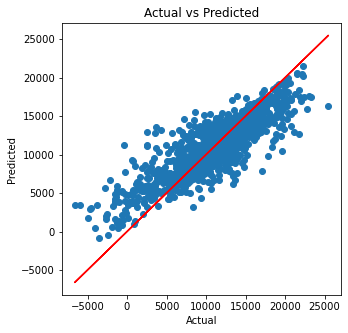

In [67]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

The Random Forest model produced an error value of 2755, which was substantially better than the previous models, and an R Squared value of 0.72 which meant that 72% of the models predictions can be explained by the model. 

## ***Decision Tree Model***   

In this machine learning model, the decision tree machine learning model represents data by partitioning it into different sections based on criteria on the predictive variables in the data.

Decision trees are easy to use and understand and can handle both categorical and numerical data. They are resistant to outliers which reduces the data preprocessing burden. New features can be easily added, enabling the development of larger classifiers by using ensemble methods.

However, decision trees are prone to overfitting. This means, when the model knows what the data is, the prediction is accurate. However, when fed unknown data, results produced may not be accurate. 
 Through parameter tuning, there is the risk of creating biased learned trees if some classes dominate.

In [68]:
clean_train2 = clean_train.copy()
clean_train2 = clean_train2.drop(['load_shortfall_3h'], axis=1)
decision_tree_cols = clean_train2.columns.values

In [69]:
# function to identify best root independent variable for the decision tree
def identify_root(col_list):

    # identify number of columns to check
    cols = col_list
    col_len = len(cols)
    new_row = {}
    results = pd.DataFrame(columns = ["independent_var", "DTM_MSE_train", "DTM_R2_train", "DTM_MSE_test", "DTM_R2_test"])

    for i in range(col_len):

        independent_var = cols[i]
        
        # determine the variables to be used in the decision tree
        X = clean_train[independent_var] # independent variable
        y = clean_train["load_shortfall_3h"] # dependent variable

        # set test size to 20 % of training data
        x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)
        
        # after importing instantiate the model to set model hyperparameters

        # building the decision tree
        from sklearn.tree import DecisionTreeRegressor
        
        # instantiate regression tree model
        regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

        # for most Sklearn models, use `.fit()` to train the model
        regr_tree.fit(x_train,y_train)
        
        # evaluate model performance using train data
        
        # get predictions for train data
        y_pred = regr_tree.predict(x_train)

        # calculate MSE
        DTM_MSE_train = mean_squared_error(y_pred,y_train)
        # claculate R-squared
        DTM_R2_train = metrics.r2_score(y_train, y_pred)

        # get predictions for test data
        y_pred = regr_tree.predict(x_test)

        # calculate MSE
        DTM_MSE_test = mean_squared_error(y_pred,y_test)
        # claculate R-squared
        DTM_R2_test = metrics.r2_score(y_test, y_pred)

        new_row = {"independent_var" : independent_var, "DTM_MSE_train" : DTM_MSE_train, "DTM_R2_train" : DTM_R2_train, "DTM_MSE_test" : DTM_MSE_test, "DTM_R2_test" : DTM_R2_test}
        #append row to the dataframe
        results = results.append(new_row, ignore_index=True)

    return results

In [70]:
decision_tree_results = identify_root(decision_tree_cols)
decision_tree_results.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_12592\4234078782.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)
C:\Users\User\AppData\Local\Temp\ipykernel_12592\4234078782.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12592\4234078782.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)
C:\Users\User\AppData\Local\Temp\ipykerne

DTM_MSE_train  DTM_R2_train  DTM_MSE_test  DTM_R2_test
count   4.800000e+01     48.000000  4.800000e+01    48.000000
mean    2.541907e+07      0.024758  2.645801e+07     0.023630
std     7.464889e+05      0.028640  7.731658e+05     0.028532
min     2.293509e+07      0.000000  2.366068e+07    -0.009856
25%     2.502182e+07      0.003775  2.606179e+07     0.003678
50%     2.574252e+07      0.012348  2.677085e+07     0.012085
75%     2.596598e+07      0.039999  2.699867e+07     0.038251
max     2.606438e+07      0.120060  2.736541e+07     0.126859

In [71]:
# select feature that produces the best MSE on the test data
check_min = str(decision_tree_results["DTM_MSE_test"].min())
query_string = str("DTM_MSE_test == " + str(check_min))
independent_var = decision_tree_results.query(query_string)["independent_var"]
print(str(independent_var.values))

['Day_Date']


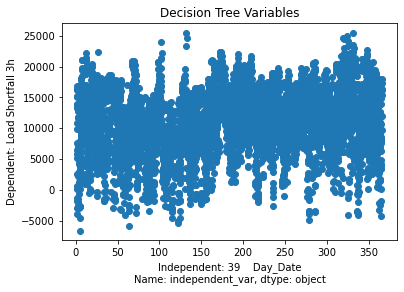

In [72]:
# determine the variables to be used in the decision tree
X = clean_train[independent_var] # independent variable
X = clean_train["Day_Num_of_Year"]
y = clean_train["load_shortfall_3h"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("Decision Tree Variables")
plt.xlabel("Independent: " + str(independent_var))
plt.ylabel("Dependent: Load Shortfall 3h")
plt.show()

In [73]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)

# building the decision tree
# instantiate the model to set model hyperparameters
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

C:\Users\User\AppData\Local\Temp\ipykernel_12592\1827557954.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)


In [74]:
# for most Sklearn models, use `.fit()` to train the model
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

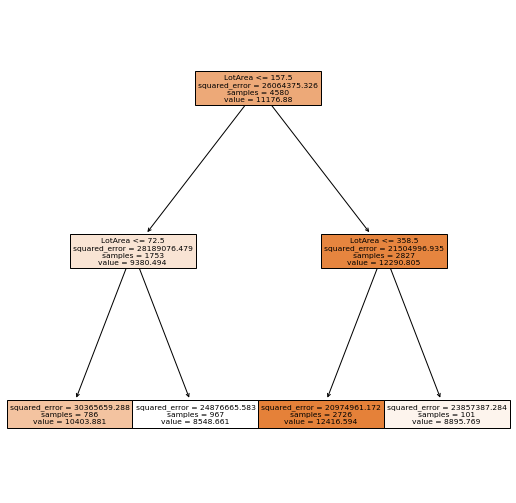

In [75]:
# visualisaton of fitted tree
plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['LotArea'],  filled=True)

In [76]:
# get predictions for test data
y_pred = regr_tree.predict(x_train)

# calculate MSE
DTM_MSE_train = mean_squared_error(y_pred,y_train)
# claculate R-squared
DTM_R2_train = metrics.r2_score(y_train, y_pred)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(DTM_MSE_train))
print('R_squared:', metrics.r2_score(y_train, y_pred))

Regression Decision Tree model RMSE is: 4844.987597799241
R_squared: 0.09938740027515947


In [77]:
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
DTM_MSE_test = mean_squared_error(y_pred,y_test)
# claculate R-squared
DTM_R2_test = metrics.r2_score(y_test, y_pred)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(DTM_MSE_test))
print('R_squared:', metrics.r2_score(y_test, y_pred))

Regression Decision Tree model RMSE is: 4964.892483060446
R_squared: 0.09034419120165416


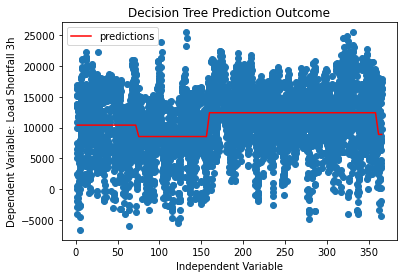

In [78]:
# visualise model performance
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis] 

# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)

# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable: Load Shortfall 3h")
plt.title("Decision Tree Prediction Outcome")
plt.legend()
plt.show()

After training the decision tree model, it produced an error value of 4844 and an R Squared value of 0.1.This was better than the previous model but still worse than the original one.

## ***RIDGE AND LASSO REGRESSION***
- Scaling data is a critical to regularisation as the penalty on particular coefficients in regularisation techniques namely L1 and L2, depends largely on the scale associated with the variables, Whereas Z-score standardisation, or simply standardisation, does not suffer from this drawback as it handles outliers gracefully.

#### ***Feature Scaling***

What is Feature Scaling?
Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In this project, we will be carrying out *Simple standardisation*, so it does not suffer from any drawbacks as it handles outliers gracefully

In [79]:
# Split data into predictors and response
X = clean_train.drop(['load_shortfall_3h'], axis=1)
y = clean_train['load_shortfall_3h']

# Create scaler object
scaler = StandardScaler()

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()


Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.689355           1.372308       -0.406655            -0.706155   
1          -0.689355           1.372308       -0.406655            -0.706155   
2          -0.689355           1.372308       -0.406655            -0.520789   
3          -0.689355           1.372308       -0.406655            -0.335423   
4          -0.689355           1.372308       -0.406655            -0.706155   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          1.048341         0.399237          -0.974518          -0.248092   
1          1.152195         0.371487          -1.078011          -0.481296   
2          1.196703         0.385362          -0.767532          -0.481296   
3          1.018669         0.524113          -0.581244          -0.481296   
4          0.766453         0.052358          -0.591593          -0.481296   

   Seville_clouds_all  Bilbao_wind_deg  ...  Day_Num_of_Year  Day_Date  \
0           -0.447598         0.884857  ...        -1.811774 -1.660069   
1           -0.447598         1.080161  ...        -1.811774 -1.660069   
2           -0.447598         1.050369  ...        -1.811774 -1.660069   
3           -0.447598         0.871616  ...        -1.811774 -1.660069   
4           -0.447598         1.066920  ...        -1.811774 -1.660069   

   Day_of_Week  Week_Day   Weekend      Hour        AM        PM  \
0     0.509037  0.628745 -0.628745 -1.506843  0.986295 -0.986295   
1     0.509037  0.628745 -0.628745 -1.071701  0.986295 -0.986295   
2     0.509037  0.628745 -0.628745 -0.636560  0.986295 -0.986295   
3     0.509037  0.628745 -0.628745 -0.201419  0.986295 -0.986295   
4     0.509037  0.628745 -0.628745  0.233722 -1.013896  1.013896   

   Day_Month_Start  Day_Month_End  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0  

[5 rows x 48 columns]

### ***Ridge Regression (L2 Norm)***
- Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity

In [80]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

# Extract the model intercept value
b0 = float(ridge.intercept_)

# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", float(b0))

Intercept: 11149.187763090813


In [81]:
# Check out the coefficients
coeff

Coefficient
Madrid_wind_speed     -349.487065
Valencia_wind_deg     -147.283054
Bilbao_rain_1h        -108.925649
Valencia_wind_speed    -48.746897
Seville_humidity      -171.552251
Madrid_humidity       -617.010349
Bilbao_clouds_all       14.906440
Bilbao_wind_speed      -85.763693
Seville_clouds_all     199.047600
Bilbao_wind_deg       -127.146168
Barcelona_wind_speed  -270.760070
Barcelona_wind_deg      31.959256
Madrid_clouds_all      158.300057
Seville_wind_speed    -164.848545
Barcelona_rain_1h      -14.041583
Seville_pressure         4.689497
Seville_rain_1h        164.211715
Bilbao_snow_3h           7.987655
Barcelona_pressure     176.184859
Seville_rain_3h         -0.757242
Madrid_rain_1h         -98.960638
Barcelona_rain_3h     -174.212427
Valencia_snow_3h         0.000000
Madrid_weather_id     -130.450535
Barcelona_weather_id   -39.138036
Bilbao_pressure        -71.223665
Seville_weather_id     132.714437
Valencia_pressure       49.192344
Madrid_pressure        130.198078
Bilbao_weather_id      103.054344
Valencia_humidity      517.763728
Madrid_temp_range      274.259413
Seville_temp_range    -119.185022
Bilbao_temp_range     -207.380397
Barcelona_temp_range   216.376321
Valencia_temp_range   -973.243087
Year                   132.065298
Month_Num              157.073230
Day_Num_of_Year        502.588667
Day_Date               491.706436
Day_of_Week              7.383404
Week_Day               459.648850
Weekend               -459.648850
Hour                 -1125.436924
AM                   -1059.513740
PM                    1059.513740
Day_Month_Start          0.000000
Day_Month_End            0.000000

#### ***Interpretation of the intercept and coefficients***

Because we standardised the features, we can compare coefficients to each other, since their respective variables are all on the same scale. We can interpret the intercepts as the expected exchange rate when all the features are equal to their respective means and the coefficients are interpreted as the expected change in exchange rate given an increase of 1 in the **scaled feature value**. 

We can intepret variables with smaller coefficients as less important as they have suffered more in the shrinkage tradeoff.

#### ***Assess the predictive accuracy of the model***
We can make use of the sklearn.metrics library to assess the accuracy of our model. For comparison, we'll fit a linear model (without regularisation) to the data

In [82]:
# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
# Check training accuracy
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 20668334.740817353
Ridge : 20668535.615031473


In [84]:
#Check training accurancy
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 18174602.708408114
Ridge : 18182912.304429445


- We can see that Ridge regression achieves a much lower score on the testing set at the expense of a slightly higher score on the training set. The increase in training MSE is not anything to be worried about since we want to avoid overfitting on the training set.

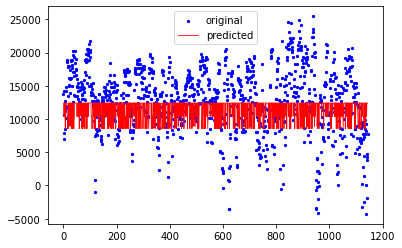

In [85]:
# Outcome visualisation
x_ax = range(len(x_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

- Ridge method applies L2 regularization to reduce overfitting in the regression model

#### ***LASSO REGRESSION (L1)***
- LASSO (Least Absolute Shrinkage and Selection Operator) is a regularization method to minimize overfitting in a regression model. It reduces large coefficients by applying the L1 regularization which is the sum of their absolute values.

##### ***Preprocessing***
We'll be using the same dataset and train/test split as in previous regression trains, and again we will need to standardize the data before it can be used in our LASSO model.

In [86]:
# Split data into predictors and response
X = clean_train.drop(['load_shortfall_3h'], axis=1)
y = clean_train['load_shortfall_3h']

# Create scaler object
scaler = StandardScaler()

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.689355           1.372308       -0.406655            -0.706155   
1          -0.689355           1.372308       -0.406655            -0.706155   
2          -0.689355           1.372308       -0.406655            -0.520789   
3          -0.689355           1.372308       -0.406655            -0.335423   
4          -0.689355           1.372308       -0.406655            -0.706155   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          1.048341         0.399237          -0.974518          -0.248092   
1          1.152195         0.371487          -1.078011          -0.481296   
2          1.196703         0.385362          -0.767532          -0.481296   
3          1.018669         0.524113          -0.581244          -0.481296   
4          0.766453         0.052358          -0.591593          -0.481296   

   Seville_clouds_all  Bilbao_wind_deg  ...  Day_Num_of_Year  Day_Date  \
0           -0.447598         0.884857  ...        -1.811774 -1.660069   
1           -0.447598         1.080161  ...        -1.811774 -1.660069   
2           -0.447598         1.050369  ...        -1.811774 -1.660069   
3           -0.447598         0.871616  ...        -1.811774 -1.660069   
4           -0.447598         1.066920  ...        -1.811774 -1.660069   

   Day_of_Week  Week_Day   Weekend      Hour        AM        PM  \
0     0.509037  0.628745 -0.628745 -1.506843  0.986295 -0.986295   
1     0.509037  0.628745 -0.628745 -1.071701  0.986295 -0.986295   
2     0.509037  0.628745 -0.628745 -0.636560  0.986295 -0.986295   
3     0.509037  0.628745 -0.628745 -0.201419  0.986295 -0.986295   
4     0.509037  0.628745 -0.628745  0.233722 -1.013896  1.013896   

   Day_Month_Start  Day_Month_End  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0  

[5 rows x 48 columns]

In [87]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.490e+10, tolerance: 1.195e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [88]:
# Extract intercept from model
intercept = float(lasso.intercept_)

# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

# Extract intercept
print("Intercept:", float(intercept))


Intercept: 11149.428650411308


#### ***Interpretation of the intercept and coefficients***
We interpret the values of the intercept and coefficients the same way as before:

The intercept can be interpreted as the expected exchange rate when all the features are equal to their means.
Each coefficient is interpreted as the expected change in the response variable given an increase of 1 in the scaled feature value.
We can see from the list of coefficients above that some of the coefficients have indeed been shrunk to exactly zero.

#### ***Assessment of predictive accuracy***

In [90]:
X_subset = clean_train.drop(['load_shortfall_3h'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                       y, 
                                                       test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

#Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

#Least squares using all predictors
lm_all = LinearRegression()

#Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [91]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [92]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

# View the results
results_df

Training MSE      Test MSE
Least Squares, Subset  2.066840e+07  1.817534e+07
Least Squares, All     2.066833e+07  1.817460e+07
Ridge                  2.066854e+07  1.818291e+07
LASSO                  2.066859e+07  1.818440e+07


Least Squares All achieved the best MSE on the test set, followed by the LASSO regression.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

**Comparing Actual value and Predicted value**

The model performance gives a measure of how well a Machine Learning model is performing. 

There are two technical considerations. 

Root Mean Square Error indicates the quality of the predictions. The lower the value, the better the quality of the predictions. Any model below a value of 3000 is considered good.

While the R-squared value indicates the proportion of predictions that were accurate. In this case, the higher the value the better the accuracy. A model with a value of more than 0.5 is considered good.

In [93]:
# Compare model performance
print('') 
print('Multi Variate Regression Model Train MSE: ' + str(MVRM_MSE_train))
print('Multi Variate Regression Model Test MSE: ' + str(MVRM_MSE_test))
print('Multi Variate Regression Model Train R2: ' + str(MVRM_R2_train))
print('Multi Variate Regression Model Test R2: ' + str(MVRM_R2_test))
print('') 
print('Support Vector Model Train MSE: ' + str(SVR_MSE_train))
print('Support Vector Model Test MSE: ' + str(SVR_MSE_test))
print('Support Vector Model Train R2: ' + str(SVR_R2_train))
print('Support Vector Model Test R2: ' + str(SVR_R2_test))
print('') 
print('Random Forest Model Train MSE: ' + str(RFM_MSE_train))
print('Random Forest Model Test MSE: ' + str(RFM_MSE_test))
print('Random Forest Model Train R2: ' + str(RFM_R2_train))
print('Random Forest Model Test R2: ' + str(RFM_R2_test))
print('') 
print('Decision Tree Model Train MSE: ' + str(DTM_MSE_train))
print('Decision Tree Model Test MSE: ' + str(DTM_MSE_test))
print('Decision Tree Model Train R2: ' + str(DTM_R2_train))
print('Decision Tree Model Test R2: ' + str(DTM_R2_test))
print('')



Multi Variate Regression Model Train MSE: 4431.693055442447
Multi Variate Regression Model Test MSE: 4689.312311128973
Multi Variate Regression Model Train R2: 0.2473159034222946
Multi Variate Regression Model Test R2: 0.18402040153465593

Support Vector Model Train MSE: 5127.08983063298
Support Vector Model Test MSE: 5236.826603567506
Support Vector Model Train R2: -0.007430853383787461
Support Vector Model Test R2: -0.017647506774650434

Random Forest Model Train MSE: 1008.2235343136916
Random Forest Model Test MSE: 2810.592386694998
Random Forest Model Train R2: 0.9606553850986532
Random Forest Model Test R2: 0.7179838493445276

Decision Tree Model Train MSE: 23473904.822828457
Decision Tree Model Test MSE: 24650157.368350115
Decision Tree Model Train R2: 0.09938740027515947
Decision Tree Model Test R2: 0.09034419120165416



<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

**Linear Regression Model**

The first model we chose to use is the linear regression model. This model is the most basic and commonly used model in predictive analysis. It generates a single line of best fit which can be used to estimate the corresponding value to a response variable. This model was very simple to implement and it produced an error value of 4689 and an R squared value of 0.18. This meant that only 18% of our predictions could be explained by our model.
This was a good start but we knew we had a long way to go. 

**Support Vector Regressor Model**


The next model we decided to use was the support vector regressor. This model differs from the simple linear regression model as it allows us to choose how tolerant we are of errors. The basic idea behind the support vector regressor is that it finds a line of best fit that is a hyperplane that has the maximum number of points. The aim is to fit as many instances as possible between the lines while limiting the margin violations. Our model produced an error value of 5127 and a substantially lower R Squared value. This model performed worse than our linear regression model and therefore we knew there was still a lot to be done going forward.


**Decision Tree Model**


The next model we used was the decision tree model. This model represents data by partitioning it into different sections based on criteria on the predictive variables in the data. Decision trees are easy to use and understand and can handle both categorical and numerical data. They are resistant to outliers which reduces the data preprocessing burden. New features can be easily added, enabling the development of larger classifiers by using ensemble methods. However, decision trees are prone to overfitting. Through parameter tuning, there is the risk of creating biased learned trees if some classes dominate. Therefore, we made sure we were aware of that to try and avoid the overfitting problem. After training this model, it produced an error value of 4844 and a R Squared value of 0.1.This was better than the previous model but still worse than the original one.(Linear Regression) So on to the next one.

**Random Forest Model** 


The next model we used was the Random Forest model. It is a supervised learning algorithm that uses ensemble learning methods for regression. It is a technique that combines multiple predictions from either different models or the same model to make a more accurate prediction than just using a single model. This model produced an error value of 2755 which was substantially better than our previous models and an R Squared value of 0.72 which meant that 72% of our models predictions can be explained by our model.

As you can see, the random forest model is clearly our best model since it produced the lowest error value and the highest R_squared value. With a R_Squared value of 0.72 we believe our model has the potential to save not just the Spanish government Billions of Euros but any government that is looking to optimize their energy consumption. 

**Conclusion**

What does this actually mean for the real world?

Through operational efficiencies, unnecessary downtime and the emergency resources to remedy the shortfall is reduced, this will result in a cost saving. By accurately predicting fossil fuel energy requirements, strategic planning for cleaner energy system implementation can be supported.

Really, it is supply and demand at play. By understanding what the energy demand could be, Potentially, incentives could be put into place to motivate people and businesses to reduce energy utilisation in peak periods, where it is feasible to do so, and so limit the price surges during high demand periods. 

Something that has not been quantified through this process is the human experience. As we have experienced ourselves Through the excessive load-shedding challenges, there is also an additional benefit of accurately predicting energy shortfalls in terms of improving the quality of people’s day-to-day lives, small business and large corporations. This all contributes to growing the economy and improving life for all citizens.

The robust methodology undertaken through this solutioneering presented by us in predicting energy shortfall may also be applied to similar supply-and-demand scenarios. 

Accurately predicting energy shortfalls can assist in balancing supply and demand which improves operational costs, reliability and efficiency. With our model, governments and businesses all over the world will be able to predict when they will have load shortfalls and thus have time to react accordingly and ensure that they have the required electricity supply available to meet the increased demand. 